# 1. Importing Libraries

In this section, we will import the libraries that we will use in this project. We will import the following libraries:

- numpy for numerical computing
- pandas for data manipulation
- matplotlib for plotting
- seaborn for plotting
- sklearn for machine learning
- scipy for scientific computing

In [1415]:
# Imports
import numpy as np
import pandas as pd

import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Loading the Data

In this section, we will load the data that we will use in this project. We will load the data from the CSV files using the pandas library. We will load the data into a pandas DataFrame.

In [1416]:
# Define path to data
file_path = "Data/"

# Load the data
crop_yield_df = pd.read_csv(file_path + "Crops production indicators - FAOSTAT_data_en_2-22-2024.csv")
fertiliser_use_df = pd.read_csv(file_path + "Fertilizers use - FAOSTAT_data_en_2-27-2024.csv")
land_temperature_change_df = pd.read_csv(file_path + "Land temperature change - FAOSTAT_data_en_2-27-2024.csv")
pesticides_use_df = pd.read_csv(file_path + "Pesticides use - FAOSTAT_data_en_2-27-2024.csv")
crop_value_df = pd.read_csv(file_path + "Food trade indicators - FAOSTAT_data_en_2-22-2024.csv")
land_use_df = pd.read_csv(file_path + "Land use - FAOSTAT_data_en_2-22-2024.csv")

C:\Users\tomna\AppData\Local\Temp\ipykernel_33504\4020878960.py:10: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  land_use_df = pd.read_csv(file_path + "Land use - FAOSTAT_data_en_2-22-2024.csv")


# 3. Data Preparation

In this section, we will prepare the data for analysis. For each of the dataframes, will perform the following steps:
- Explore the data
- Check for missing values
- Check for duplicate rows
- Drop unnecessary columns
- Group data if necessary to get totals and averages
- Rename value column to a more descriptive name for easier reference

## 3.1. Crop Yield Data

In [1417]:
# Display the first few rows of the crop yield data
crop_yield_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2000,2000,100 g/ha,8063,A,Official figure,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2001,2001,100 g/ha,10067,A,Official figure,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2002,2002,100 g/ha,16698,A,Official figure,NaN
3,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2003,2003,100 g/ha,14580,A,Official figure,NaN
4,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2004,2004,100 g/ha,13348,A,Official figure,NaN


In [1418]:

# Describe the crop yield data
crop_yield_df.describe()

,Area Code (M49),Element Code,Year Code,Year,Value,Note
count,41649.000000,41649.0,41649.000000,41649.000000,4.164900e+04,0.0
mean,425.491777,5419.0,2010.900478,2010.900478,1.056544e+05,NaN
std,255.597188,0.0,6.614270,6.614270,1.688875e+05,NaN
min,4.000000,5419.0,2000.000000,2000.000000,0.000000e+00,NaN
25%,203.000000,5419.0,2005.000000,2005.000000,8.469000e+03,NaN
50%,417.000000,5419.0,2011.000000,2011.000000,3.828200e+04,NaN
75%,643.000000,5419.0,2017.000000,2017.000000,1.289290e+05,NaN
max,894.000000,5419.0,2022.000000,2022.000000,1.359231e+06,NaN


In [1419]:

# Print information about the crop yield data
crop_yield_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41649 entries, 0 to 41648
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       41649 non-null  object 
 1   Domain            41649 non-null  object 
 2   Area Code (M49)   41649 non-null  int64  
 3   Area              41649 non-null  object 
 4   Element Code      41649 non-null  int64  
 5   Element           41649 non-null  object 
 6   Item Code (CPC)   41649 non-null  object 
 7   Item              41649 non-null  object 
 8   Year Code         41649 non-null  int64  
 9   Year              41649 non-null  int64  
 10  Unit              41649 non-null  object 
 11  Value             41649 non-null  int64  
 12  Flag              41649 non-null  object 
 13  Flag Description  41649 non-null  object 
 14  Note              0 non-null      float64
dtypes: float64(1), int64(5), object(9)
memory usage: 4.8+ MB


In [1420]:
# Check for missing values
crop_yield_df.isnull().sum()

Domain Code             0
Domain                  0
Area Code (M49)         0
Area                    0
Element Code            0
Element                 0
Item Code (CPC)         0
Item                    0
Year Code               0
Year                    0
Unit                    0
Value                   0
Flag                    0
Flag Description        0
Note                41649
dtype: int64

In [1421]:
# Check for duplicate rows
crop_yield_df.duplicated().sum()

0

In [1422]:
# Drop unnecessary columns
crop_yield_df = crop_yield_df.drop(columns=["Domain", "Domain Code", "Element Code", "Element", "Year Code", "Unit", "Flag", "Flag Description", "Note", "Item Code (CPC)"])

# Rename value column to yield in 100g/ha
crop_yield_df = crop_yield_df.rename(columns={"Value": "Yield in 100g/ha"})

# Display the first few rows of the crop yield data
crop_yield_df.head()

,Area Code (M49),Area,Item,Year,Yield in 100g/ha
0,4,Afghanistan,"Cereals, primary",2000,8063
1,4,Afghanistan,"Cereals, primary",2001,10067
2,4,Afghanistan,"Cereals, primary",2002,16698
3,4,Afghanistan,"Cereals, primary",2003,14580
4,4,Afghanistan,"Cereals, primary",2004,13348


## 3.2. Fertiliser Use Data

In [1423]:
# Display the first few rows of the fertiliser use data
fertiliser_use_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2002,2002,t,17900.0,I,Imputed value
1,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2003,2003,t,33200.0,I,Imputed value
2,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2004,2004,t,47700.0,I,Imputed value
3,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4001,Urea,2004,2004,t,42300.0,I,Imputed value
4,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4001,Urea,2005,2005,t,20577.0,I,Imputed value


In [1424]:

# Describe the fertiliser use data
fertiliser_use_df.describe()

,Area Code (M49),Element Code,Item Code,Year Code,Year,Value
count,17807.000000,17807.0,17807.000000,17807.000000,17807.000000,1.780700e+04
mean,428.095861,5157.0,4013.974224,2011.259224,2011.259224,2.124516e+05
std,252.862476,0.0,9.034514,5.443312,5.443312,1.408350e+06
min,4.000000,5157.0,4001.000000,2002.000000,2002.000000,0.000000e+00
25%,208.000000,5157.0,4004.000000,2007.000000,2007.000000,1.000000e+02
50%,414.000000,5157.0,4016.000000,2011.000000,2011.000000,3.584000e+03
75%,620.000000,5157.0,4022.000000,2016.000000,2016.000000,4.573800e+04
max,894.000000,5157.0,4030.000000,2021.000000,2021.000000,9.621329e+07


In [1425]:

# Print information about the fertiliser use data
fertiliser_use_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17807 entries, 0 to 17806
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       17807 non-null  object 
 1   Domain            17807 non-null  object 
 2   Area Code (M49)   17807 non-null  int64  
 3   Area              17807 non-null  object 
 4   Element Code      17807 non-null  int64  
 5   Element           17807 non-null  object 
 6   Item Code         17807 non-null  int64  
 7   Item              17807 non-null  object 
 8   Year Code         17807 non-null  int64  
 9   Year              17807 non-null  int64  
 10  Unit              17807 non-null  object 
 11  Value             17807 non-null  float64
 12  Flag              17807 non-null  object 
 13  Flag Description  17807 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 1.9+ MB


In [1426]:

# Check for missing values
fertiliser_use_df.isnull().sum()

Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Item Code           0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

In [1427]:

# Check for duplicate rows
fertiliser_use_df.duplicated().sum()

0

In [1428]:
# Drop unnecessary columns
fertiliser_use_df = fertiliser_use_df.drop(columns=["Domain", "Domain Code", "Element Code", "Element", "Year Code", "Unit", "Flag", "Flag Description", "Item Code", "Item"])

# Group data by country and year to get the total fertiliser use
fertiliser_use_df = fertiliser_use_df.groupby(["Area", "Year", "Area Code (M49)"]).sum().reset_index()

# Rename value column to total fertiliser use in tonnes
fertiliser_use_df = fertiliser_use_df.rename(columns={"Value": "Total Fertiliser Use in Tonnes"})

# Display the first few rows of the fertiliser use data
fertiliser_use_df.head()

,Area,Year,Area Code (M49),Total Fertiliser Use in Tonnes
0,Afghanistan,2002,4,17900.0
1,Afghanistan,2003,4,33200.0
2,Afghanistan,2004,4,90000.0
3,Afghanistan,2005,4,20577.0
4,Afghanistan,2006,4,68253.0


## 3.3. Land Temperature Change Data

In [1429]:
# Display the first few rows of the land temperature change data
land_temperature_change_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2000,2000,°c,0.618,E,Estimated value
1,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2001,2001,°c,0.365,E,Estimated value
2,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2002,2002,°c,1.655,E,Estimated value
3,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2003,2003,°c,0.997,E,Estimated value
4,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2004,2004,°c,1.883,E,Estimated value


In [1430]:
# Describe the land temperature change data
land_temperature_change_df.describe()

,Area Code (M49),Element Code,Months Code,Year Code,Year,Value
count,54810.000000,54810.000000,54810.000000,54810.000000,54810.000000,48255.000000
mean,434.977194,6674.500000,7018.000000,2011.021346,2011.021346,0.802197
std,253.978304,596.505442,1.414226,6.629795,6.629795,0.669648
min,4.000000,6078.000000,7016.000000,2000.000000,2000.000000,-4.176000
25%,214.000000,6078.000000,7017.000000,2005.000000,2005.000000,0.364000
50%,434.000000,6674.500000,7018.000000,2011.000000,2011.000000,0.643000
75%,654.000000,7271.000000,7019.000000,2017.000000,2017.000000,1.084000
max,894.000000,7271.000000,7020.000000,2022.000000,2022.000000,8.200000


In [1431]:
# Print information about the land temperature change data
land_temperature_change_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54810 entries, 0 to 54809
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       54810 non-null  object 
 1   Domain            54810 non-null  object 
 2   Area Code (M49)   54810 non-null  int64  
 3   Area              54810 non-null  object 
 4   Element Code      54810 non-null  int64  
 5   Element           54810 non-null  object 
 6   Months Code       54810 non-null  int64  
 7   Months            54810 non-null  object 
 8   Year Code         54810 non-null  int64  
 9   Year              54810 non-null  int64  
 10  Unit              54810 non-null  object 
 11  Value             48255 non-null  float64
 12  Flag              54810 non-null  object 
 13  Flag Description  54810 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 5.9+ MB


In [1432]:
# Filter land temperature change to get only meteorological year
land_temperature_change_df = land_temperature_change_df[land_temperature_change_df["Months"] == "Meteorological year"]

# Split df into two dataframes: one for temperature change and one for standard deviation
land_temperature_change_df = land_temperature_change_df[land_temperature_change_df["Element"] == "Temperature change"]
land_temperature_change_std_df = land_temperature_change_df[land_temperature_change_df["Element"] == "Standard Deviation"]

# Drop unnecessary columns
land_temperature_change_df = land_temperature_change_df.drop(columns=["Domain", "Domain Code", "Element Code", "Element", "Year Code", "Unit", "Flag", "Flag Description", "Months", "Months Code", "Area Code (M49)"])

# If all values for the country are missing, drop the country
land_temperature_change_df = land_temperature_change_df.groupby('Area').filter(lambda x: x[['Value']].notna().any().any())

# Impute missing values with the mean for the country
land_temperature_change_df['Value'] = land_temperature_change_df.groupby('Area',)['Value'].transform(lambda x: x.fillna(x.mean()))

In [1433]:
# Check for missing values
land_temperature_change_df.isnull().sum()

Area     0
Year     0
Value    0
dtype: int64

In [1434]:
# Check for duplicate rows
land_temperature_change_df.duplicated().sum()

0

In [1435]:
# Rename value column to temperature change in degrees celsius
land_temperature_change_df = land_temperature_change_df.rename(columns={"Value": "Temperature Change in Degrees Celsius"})

# Display the first few rows of the land temperature change data
land_temperature_change_df.head()

,Area,Year,Temperature Change in Degrees Celsius
184,Afghanistan,2000,0.993
185,Afghanistan,2001,1.311
186,Afghanistan,2002,1.365
187,Afghanistan,2003,0.587
188,Afghanistan,2004,1.373


## 3.4. Pesticides Use Data

In [1436]:
# Display the first few rows of the pesticides use data
pesticides_use_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),2000,2000,t,307.98,E,Estimated value,NaN
1,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2000,2000,kg/ha,0.44,E,Estimated value,NaN
2,RP,Pesticides Use,8,Albania,5173,Use per value of agricultural production,1357,Pesticides (total),2000,2000,g/Int$,0.23,E,Estimated value,NaN
3,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),2001,2001,t,319.38,E,Estimated value,NaN
4,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2001,2001,kg/ha,0.46,E,Estimated value,NaN


In [1437]:
# Describe the pesticides use data
pesticides_use_df.describe()

,Area Code (M49),Element Code,Item Code,Year Code,Year,Value
count,35202.000000,35202.000000,35202.000000,35202.000000,35202.000000,35202.000000
mean,424.550423,5158.978694,1340.576445,2010.510852,2010.510852,3855.186176
std,248.441525,4.950079,17.776129,6.341302,6.341302,24198.051890
min,8.000000,5157.000000,1309.000000,2000.000000,2000.000000,0.000000
25%,208.000000,5157.000000,1320.000000,2005.000000,2005.000000,0.430000
50%,418.000000,5157.000000,1345.000000,2011.000000,2011.000000,8.075000
75%,626.000000,5157.000000,1357.000000,2016.000000,2016.000000,366.012500
max,894.000000,5173.000000,1357.000000,2021.000000,2021.000000,719507.440000


In [1438]:
# Print information about the pesticides use data
pesticides_use_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35202 entries, 0 to 35201
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       35202 non-null  object 
 1   Domain            35202 non-null  object 
 2   Area Code (M49)   35202 non-null  int64  
 3   Area              35202 non-null  object 
 4   Element Code      35202 non-null  int64  
 5   Element           35202 non-null  object 
 6   Item Code         35202 non-null  int64  
 7   Item              35202 non-null  object 
 8   Year Code         35202 non-null  int64  
 9   Year              35202 non-null  int64  
 10  Unit              35202 non-null  object 
 11  Value             35202 non-null  float64
 12  Flag              35202 non-null  object 
 13  Flag Description  35202 non-null  object 
 14  Note              198 non-null    object 
dtypes: float64(1), int64(5), object(9)
memory usage: 4.0+ MB


In [1439]:
# Get only the total pesticides used and only Agricultural Use
pesticides_use_df = pesticides_use_df[(pesticides_use_df["Item Code"] == 1357) & (pesticides_use_df["Element"] == "Agricultural Use")]
# Drop unnecessary columns
pesticides_use_df = pesticides_use_df.drop(columns=["Domain", "Domain Code", "Element Code", "Year Code", "Flag", "Flag Description", "Item Code", "Item", "Note", "Unit", "Element" , "Area Code (M49)" ])

# Check for missing values
pesticides_use_df.isnull().sum()

Area     0
Year     0
Value    0
dtype: int64

In [1440]:
# Check for duplicate rows
pesticides_use_df.duplicated().sum()

0

In [1441]:
# Rename value column to total pesticides use in tonnes
pesticides_use_df = pesticides_use_df.rename(columns={"Value": "Total Pesticides Use in Tonnes"})

# Display the first few rows of the pesticides use data
pesticides_use_df.head()

,Area,Year,Total Pesticides Use in Tonnes
0,Albania,2000,307.98
3,Albania,2001,319.38
6,Albania,2002,330.78
9,Albania,2003,342.17
12,Albania,2004,353.57


## 3.5. Crop Value Data

In [1442]:
# Display the first few rows of the crop value data
crop_value_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1991,1991,1000 USD,41600.0,A,Official figure,NaN
1,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1992,1992,1000 USD,25600.0,E,Estimated value,NaN
2,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1993,1993,1000 USD,40000.0,E,Estimated value,NaN
3,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1994,1994,1000 USD,25700.0,E,Estimated value,NaN
4,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1995,1995,1000 USD,37720.0,E,Estimated value,NaN


In [1443]:
# Describe the crop value data
crop_value_df.describe()

,Area Code (M49),Element Code,Year Code,Year,Value,Note
count,141738.000000,141738.000000,141738.000000,141738.000000,1.417380e+05,0.0
mean,424.988359,5765.555010,2006.724273,2006.724273,4.572981e+05,NaN
std,253.512489,149.862005,9.168199,9.168199,1.876930e+06,NaN
min,4.000000,5622.000000,1991.000000,1991.000000,0.000000e+00,NaN
25%,204.000000,5622.000000,1999.000000,1999.000000,2.150000e+03,NaN
50%,414.000000,5622.000000,2007.000000,2007.000000,2.406200e+04,NaN
75%,643.000000,5922.000000,2015.000000,2015.000000,1.764239e+05,NaN
max,894.000000,5922.000000,2022.000000,2022.000000,8.355806e+07,NaN


In [1444]:
# Print information about the crop value data
crop_value_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141738 entries, 0 to 141737
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       141738 non-null  object 
 1   Domain            141738 non-null  object 
 2   Area Code (M49)   141738 non-null  int64  
 3   Area              141738 non-null  object 
 4   Element Code      141738 non-null  int64  
 5   Element           141738 non-null  object 
 6   Item Code (CPC)   141738 non-null  object 
 7   Item              141738 non-null  object 
 8   Year Code         141738 non-null  int64  
 9   Year              141738 non-null  int64  
 10  Unit              141738 non-null  object 
 11  Value             141738 non-null  float64
 12  Flag              141738 non-null  object 
 13  Flag Description  141738 non-null  object 
 14  Note              0 non-null       float64
dtypes: float64(2), int64(4), object(9)
memory usage: 16.2+ MB


In [1445]:
# Drop unnecessary columns
crop_value_df = crop_value_df.drop(columns=["Domain", "Domain Code",  "Year Code", "Flag", "Flag Description", "Note", "Unit", "Item Code (CPC)", "Area Code (M49)"])

# Check for missing values
crop_value_df.isnull().sum()

Area            0
Element Code    0
Element         0
Item            0
Year            0
Value           0
dtype: int64

In [1446]:
# Split the data into two dataframes: one for imports and one for exports
crop_value_imports_df = crop_value_df[crop_value_df["Element"] == "Import Value"]
crop_value_exports_df = crop_value_df[crop_value_df["Element"] == "Export Value"]

# Drop unnecessary columns
crop_value_imports_df = crop_value_imports_df.drop(columns=["Element", "Element Code"])
crop_value_exports_df = crop_value_exports_df.drop(columns=["Element", "Element Code"])

# Rename value column to crop value in 1000 US$
crop_value_imports_df = crop_value_imports_df.rename(columns={"Value": "Total Import Crop Value in 1000 US$"})
crop_value_exports_df = crop_value_exports_df.rename(columns={"Value": "Total Export Crop Value in 1000 US$"})

# Display the first few rows of the crop import data
crop_value_imports_df.head()

,Area,Item,Year,Total Import Crop Value in 1000 US$
0,Afghanistan,Cereals and Preparations,1991,41600.0
1,Afghanistan,Cereals and Preparations,1992,25600.0
2,Afghanistan,Cereals and Preparations,1993,40000.0
3,Afghanistan,Cereals and Preparations,1994,25700.0
4,Afghanistan,Cereals and Preparations,1995,37720.0


In [1447]:
# Display the first few rows of the crop import data
crop_value_exports_df.head()

,Area,Item,Year,Total Export Crop Value in 1000 US$
19,Afghanistan,Cereals and Preparations,2009,15.0
21,Afghanistan,Cereals and Preparations,2010,54.0
23,Afghanistan,Cereals and Preparations,2011,0.0
25,Afghanistan,Cereals and Preparations,2012,0.0
27,Afghanistan,Cereals and Preparations,2013,0.0


## 3.6. Land Use Data

In [1448]:
# Display the first few rows of the land use data
land_use_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1980,1980,1000 ha,65286.0,A,Official figure,NaN
1,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1981,1981,1000 ha,65286.0,A,Official figure,NaN
2,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1982,1982,1000 ha,65286.0,A,Official figure,NaN
3,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1983,1983,1000 ha,65286.0,A,Official figure,NaN
4,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1984,1984,1000 ha,65286.0,A,Official figure,NaN


In [1449]:
# Describe the land use data
land_use_df.describe()

,Area Code (M49),Element Code,Item Code,Year Code,Year,Value
count,97995.000000,97995.0,97995.000000,97995.000000,97995.000000,9.799500e+04
mean,430.530884,5110.0,6627.879984,2002.966988,2002.966988,2.044488e+04
std,255.076689,0.0,26.601230,11.828224,11.828224,9.502952e+04
min,4.000000,5110.0,6600.000000,1980.000000,1980.000000,0.000000e+00
25%,208.000000,5110.0,6602.000000,1993.000000,1993.000000,3.000000e+01
50%,426.000000,5110.0,6621.000000,2004.000000,2004.000000,7.037793e+02
75%,646.000000,5110.0,6650.000000,2013.000000,2013.000000,6.500000e+03
max,894.000000,5110.0,6695.000000,2021.000000,2021.000000,2.241237e+06


In [1450]:
# Print information about the land use data
land_use_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97995 entries, 0 to 97994
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       97995 non-null  object 
 1   Domain            97995 non-null  object 
 2   Area Code (M49)   97995 non-null  int64  
 3   Area              97995 non-null  object 
 4   Element Code      97995 non-null  int64  
 5   Element           97995 non-null  object 
 6   Item Code         97995 non-null  int64  
 7   Item              97995 non-null  object 
 8   Year Code         97995 non-null  int64  
 9   Year              97995 non-null  int64  
 10  Unit              97995 non-null  object 
 11  Value             97995 non-null  float64
 12  Flag              97995 non-null  object 
 13  Flag Description  97995 non-null  object 
 14  Note              1 non-null      object 
dtypes: float64(1), int64(5), object(9)
memory usage: 11.2+ MB


In [1451]:
# Filter to select only agricultural land
land_use_df = land_use_df[land_use_df["Item"] == "Agricultural land"]
# Drop unnecessary columns
land_use_df = land_use_df.drop(columns=["Domain", "Domain Code", "Year Code", "Flag", "Flag Description", "Note", "Element", "Element Code", "Item Code", "Item", "Unit", "Area Code (M49)"])

# Check for missing values
land_use_df.isnull().sum()

Area     0
Year     0
Value    0
dtype: int64

In [1452]:
# Check for duplicate rows
land_use_df.duplicated().sum()

0

In [1453]:
# Rename value column to agricultural land in hectares
land_use_df = land_use_df.rename(columns={"Value": "Agricultural Land in Hectares"})
# Display the first few rows of the land use data
land_use_df.head()

,Area,Year,Agricultural Land in Hectares
126,Afghanistan,1980,38049.0
127,Afghanistan,1981,38053.0
128,Afghanistan,1982,38054.0
129,Afghanistan,1983,38054.0
130,Afghanistan,1984,38054.0


# 3.7. Merging Data

In this section, I will merge all the dataframes into a single dataframe.


### Standardising Items
Combine different items so that they match across datasets, combining them to make a harmonised dataset. This will help in merging the datasets.

In [1454]:
# Views the unique items in the 'Item' column of the datasets
print("Unique Items in Crops Production Indicators:\n", crop_yield_df['Item'].unique())

Unique Items in Crops Production Indicators:
 ['Cereals, primary' 'Citrus Fruit, Total' 'Fibre Crops, Fibre Equivalent'
 'Fruit Primary' 'Oilcrops, Cake Equivalent' 'Oilcrops, Oil Equivalent'
 'Pulses, Total' 'Roots and Tubers, Total' 'Sugar Crops Primary'
 'Treenuts, Total' 'Vegetables Primary']


In [1455]:
print("Unique Items in Food Trade Indicators:\n", crop_value_exports_df['Item'].unique())

Unique Items in Food Trade Indicators:
 ['Cereals and Preparations' 'Fats and Oils (excluding Butter)'
 'Meat and Meat Preparations' 'Sugar and Honey' 'Fruit and Vegetables'
 'Dairy Products and Eggs' 'Alcoholic Beverages' 'Non-alcoholic Beverages'
 'Other food' 'Non-food' 'Non-edible Fats and Oils' 'Tobacco']


In [1456]:
# Create dictionaries to map the items to their respective categories
harmonized_mapping = {
    'Cereals, primary': 'Cereals and Grains',
    'Citrus Fruit, Total': 'Fruits and Vegetables',
    'Fibre Crops, Fibre Equivalent': 'Fibre and Textile Crops',
    'Fruit Primary': 'Fruits and Vegetables',
    'Oilcrops, Cake Equivalent': 'Nuts and Oilseeds',
    'Oilcrops, Oil Equivalent': 'Nuts and Oilseeds',
    'Pulses, Total': 'Miscellaneous',  # Generalized here to ensure it's not lost
    'Roots and Tubers, Total': 'Fruits and Vegetables',  # Grouped with Fruits and Vegetables for broader inclusion
    'Sugar Crops Primary': 'Sugar and Sweeteners',
    'Treenuts, Total': 'Nuts and Oilseeds',
    'Vegetables Primary': 'Fruits and Vegetables',
    'Cereals and Preparations': 'Cereals and Grains',
    'Fats and Oils (excluding Butter)': 'Nuts and Oilseeds',
    'Meat and Meat Preparations': 'Animal Products',
    'Sugar and Honey': 'Sugar and Sweeteners',
    'Fruit and Vegetables': 'Fruits and Vegetables',
    'Dairy Products and Eggs': 'Animal Products',
    'Alcoholic Beverages': 'Beverages and Alcoholic Products',
    'Non-alcoholic Beverages': 'Beverages and Alcoholic Products',
    'Other food': 'Miscellaneous',
    'Non-food': 'Miscellaneous',
    'Non-edible Fats and Oils': 'Miscellaneous',
    'Tobacco': 'Miscellaneous',
}

# Adds a Harmonised Item column to the datasets with the mapped items
crop_yield_df['Harmonised Item'] = crop_yield_df['Item'].map(harmonized_mapping)
crop_value_exports_df['Harmonised Item'] = crop_value_exports_df['Item'].map(harmonized_mapping)
crop_value_imports_df['Harmonised Item'] = crop_value_imports_df['Item'].map(harmonized_mapping)

# Drops unnecessary columns
crop_yield_df = crop_yield_df.drop(columns=['Item'])
crop_value_exports_df = crop_value_exports_df.drop(columns=['Item'])
crop_value_imports_df = crop_value_imports_df.drop(columns=['Item'])

# Group the data by Area, Year, and Harmonised Item
crop_yield_df = crop_yield_df.groupby(['Area', 'Year', 'Harmonised Item']).sum().reset_index()
crop_value_exports_df = crop_value_exports_df.groupby(['Area', 'Year', 'Harmonised Item']).sum().reset_index()
crop_value_imports_df = crop_value_imports_df.groupby(['Area', 'Year', 'Harmonised Item']).sum().reset_index()

# Display the first few rows of the datasets
print("Crops Production Indicators:\n", crop_yield_df.head())

Crops Production Indicators:
           Area  Year          Harmonised Item  Area Code (M49)  \
0  Afghanistan  2000       Cereals and Grains                4   
1  Afghanistan  2000  Fibre and Textile Crops                4   
2  Afghanistan  2000    Fruits and Vegetables               16   
3  Afghanistan  2000            Miscellaneous                4   
4  Afghanistan  2000        Nuts and Oilseeds               12   

   Yield in 100g/ha  
0              8063  
1              3990  
2            439986  
3             10203  
4             22442  


### 3.7.2 Merging Data

In this section, I will merge all the dataframes into a single dataframe. I will merge the dataframes on the following columns:
- Area
- Area Code (M49)
- Year
- Harmonised Item (for Crop Yield and Crop Value Data)

In [1457]:
# Merge all the dataframes into a single dataframe
merged_df = crop_yield_df.merge(crop_value_exports_df, how="inner", left_on=["Area", "Year", 'Harmonised Item'], right_on=["Area", "Year", 'Harmonised Item'])
merged_df = merged_df.merge(crop_value_imports_df, how="inner", left_on=["Area", "Year", 'Harmonised Item'], right_on=["Area", "Year", 'Harmonised Item'])
merged_df.head()
merged_df = merged_df.merge(land_temperature_change_df, how="inner", left_on=["Area", "Year"], right_on=["Area", "Year"])
merged_df = merged_df.merge(pesticides_use_df, how="inner", left_on=["Area", "Year"], right_on=["Area", "Year"])
merged_df = merged_df.merge(land_use_df, how="inner", left_on=["Area", "Year"], right_on=["Area", "Year"])
merged_df = merged_df.merge(fertiliser_use_df, how="inner", left_on=["Area", "Year"], right_on=["Area", "Year"])

In [1458]:
# Describe the merged dataframe
merged_df.describe()

,Year,Area Code (M49)_x,Yield in 100g/ha,Total Export Crop Value in 1000 US$,Total Import Crop Value in 1000 US$,Temperature Change in Degrees Celsius,Total Pesticides Use in Tonnes,Agricultural Land in Hectares,Area Code (M49)_y,Total Fertiliser Use in Tonnes
count,8446.000000,8446.000000,8.446000e+03,8.446000e+03,8.446000e+03,8446.00000,8446.000000,8446.000000,8446.000000,8.446000e+03
mean,2010.036112,806.377694,2.358119e+05,1.073059e+06,1.007354e+06,1.03731,19399.733657,27224.240531,417.580156,2.218370e+06
std,5.297832,757.259734,3.112636e+05,3.836826e+06,2.921372e+06,0.52415,57742.102321,61099.685370,252.915771,7.493214e+06
min,2002.000000,8.000000,4.800000e+01,0.000000e+00,2.450000e+02,-0.47800,0.660000,1.500000,8.000000,0.000000e+00
25%,2006.000000,266.000000,1.604575e+04,9.930750e+03,5.411300e+04,0.69200,573.260000,1698.775000,203.000000,3.819700e+04
50%,2009.000000,566.000000,4.073150e+04,9.195534e+04,1.998879e+05,0.95100,2358.010000,5296.000000,404.000000,2.379890e+05
75%,2014.000000,1068.000000,4.554350e+05,5.130612e+05,7.387773e+05,1.31100,10549.000000,24967.370000,608.000000,1.038263e+06
max,2021.000000,3576.000000,1.554874e+06,7.292108e+07,5.258387e+07,3.55000,472977.150000,447000.000000,894.000000,9.665856e+07


In [1459]:
# Show the shape of the merged dataframe (26785, 10)
merged_df.shape

(8446, 12)

In [1460]:
# Count the number of countries in the merged dataframe (186)
merged_df['Area'].nunique()

156

In [1461]:
# Count number of years in the merged dataframe (22)
merged_df['Year'].nunique()

20

# 4. Exploratory Data Analysis 

In this section, we will perform exploratory data analysis on the merged data. We will explore the following:
- Crop Yield Analysis
- Fertiliser Use Analysis
- Land Temperature Change Analysis
- Pesticides Use Analysis
- Crop Value Analysis
- Land Use Analysis
- Correlation Analysis

## 4.1 Crop Yield Analysis

In this section, we will perform exploratory data analysis on the crop yield data. We will explore the following:
- Mean crop yield over the years for all countries by crop type
- Crop yield distribution (using log scale and non-zero values only)
- Frequency of crop yield values

In [1462]:
# # Prepare the data for analysis
crop_yield_mean = crop_yield_df.groupby(['Year', 'Harmonised Item'])['Yield in 100g/ha'].mean()
crop_yield_total = crop_yield_df.groupby(['Year', 'Harmonised Item'])['Yield in 100g/ha'].sum()
non_zero_crop_yield = crop_yield_df[crop_yield_df['Yield in 100g/ha'] > 0]

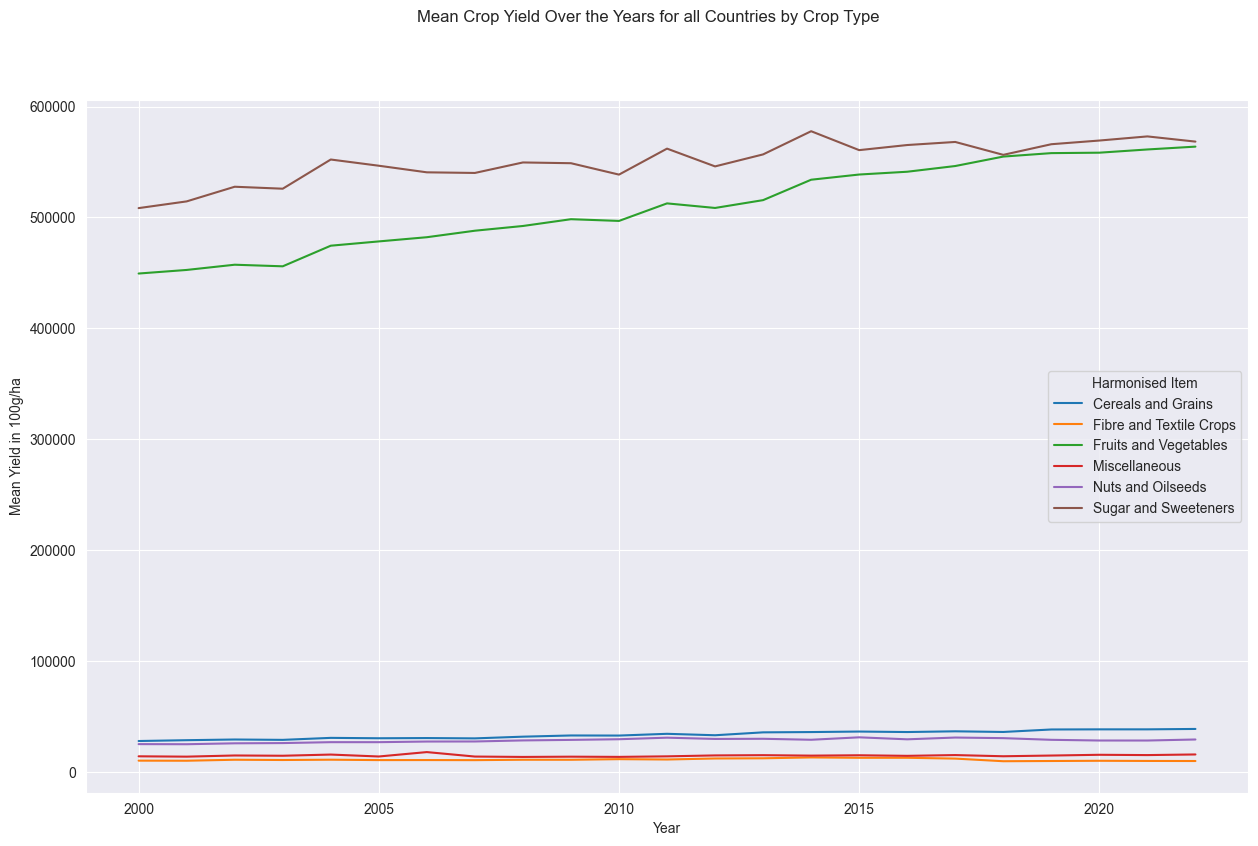

In [1463]:
# Plot the mean crop yield over the years
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Mean Crop Yield Over the Years for all Countries by Crop Type")

crop_yield_mean.unstack().plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Mean Yield in 100g/ha")

plt.show()

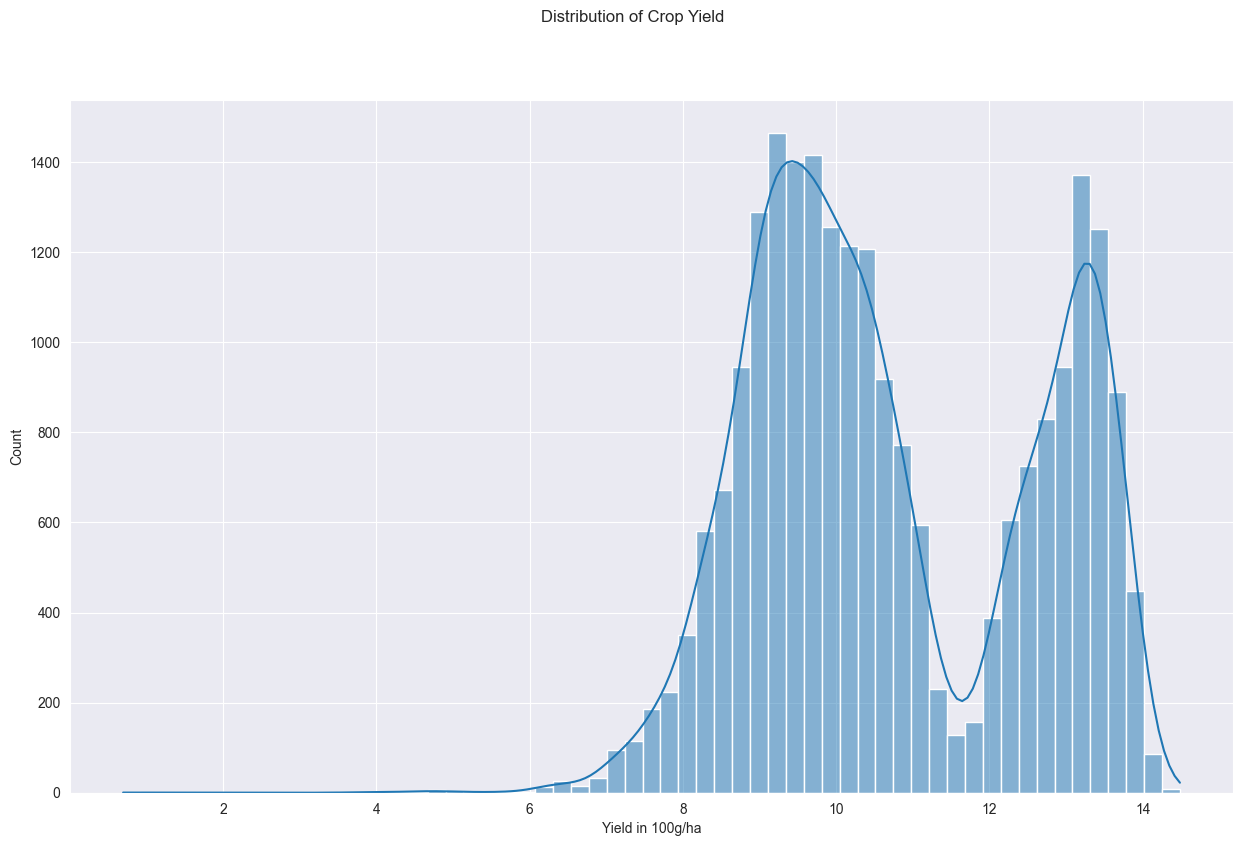

In [1464]:
# Plot the distribution of crop yield
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Distribution of Crop Yield")

sns.histplot(np.log1p(non_zero_crop_yield['Yield in 100g/ha']), kde=True, ax=ax)
plt.xlabel("Yield in 100g/ha")

plt.show()

C:\Users\tomna\AppData\Local\Temp\ipykernel_33504\2212424403.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(x='Harmonised Item', y='Frequency', data=temp, ax=ax, palette='viridis')


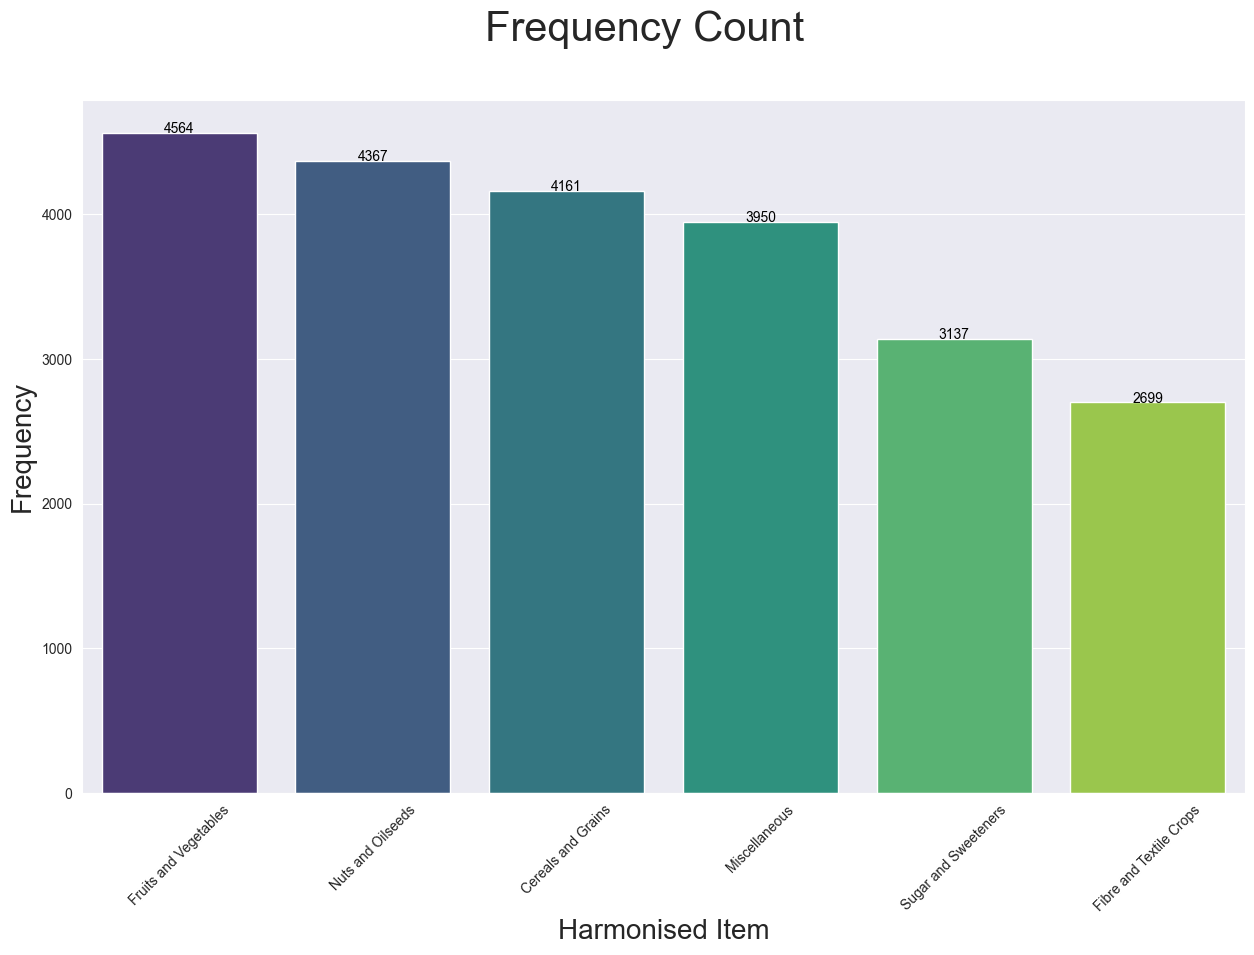

In [1465]:
# Count the values and reset the index
temp = crop_yield_df['Harmonised Item'].value_counts().reset_index()
temp.columns = ['Harmonised Item', 'Frequency']  # Correctly naming the columns for clarity

# Plotting
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Frequency Count', size=30)

# Using renamed columns
graph = sns.barplot(x='Harmonised Item', y='Frequency', data=temp, ax=ax, palette='viridis')

# Adding text labels on bars
for index, row in temp.iterrows():
    graph.text(index, row['Frequency'], row['Frequency'], color='black', ha="center")

plt.xlabel('Harmonised Item', size=20)
plt.ylabel('Frequency', size=20)
plt.xticks(rotation=45) # Rotating the x-axis labels for better visibility

plt.show()

## 4.2 Fertiliser Use Analysis

In this section, we will perform exploratory data analysis on the fertiliser use data. We will explore the following:
- Mean fertiliser use over the years for all countries
- Fertiliser use distribution (using log scale and non-zero values only)
- Fertiliser use correlation with crop yield

In [1466]:
# Prepare the data for analysis
fertiliser_use_mean = fertiliser_use_df.groupby('Year')['Total Fertiliser Use in Tonnes'].mean()
fertiliser_use_total = fertiliser_use_df.groupby('Year')['Total Fertiliser Use in Tonnes'].sum()

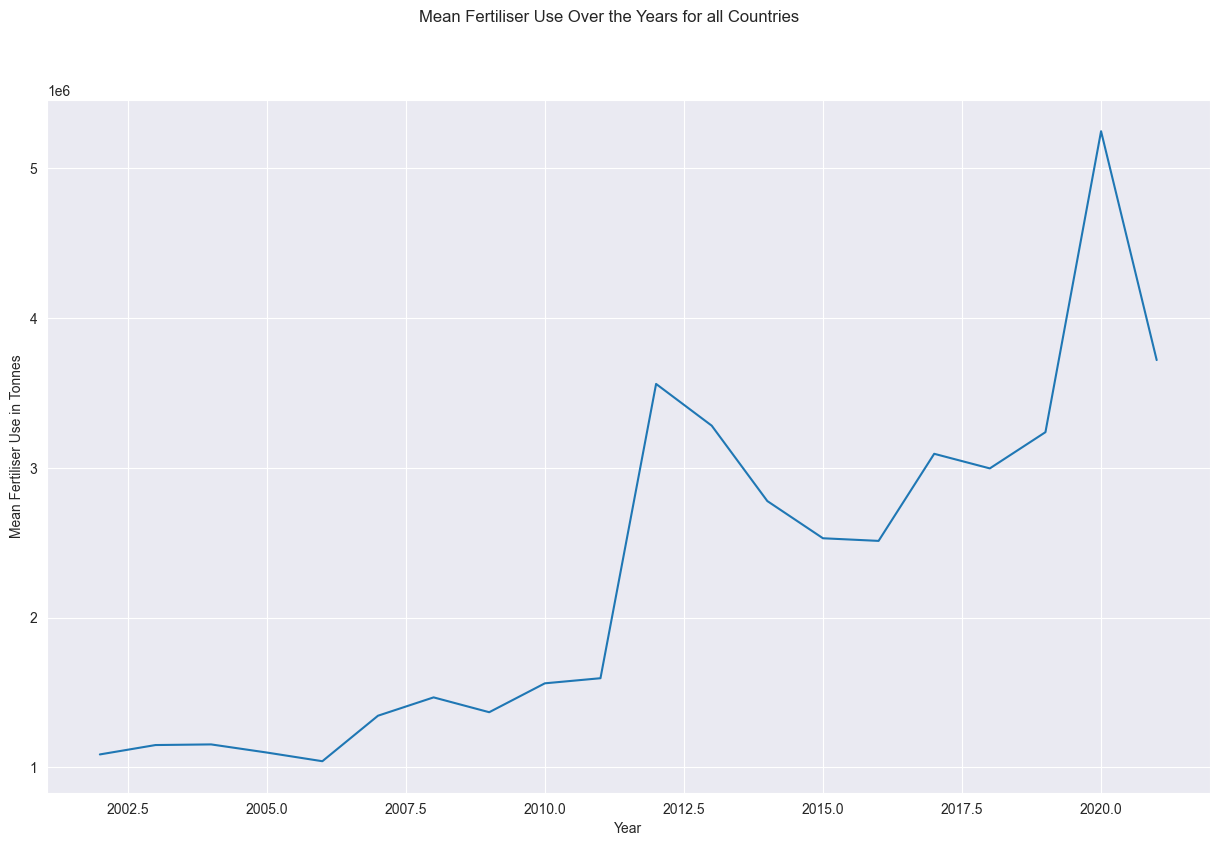

In [1467]:
# Plot the mean fertiliser use over the years
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Mean Fertiliser Use Over the Years for all Countries")

fertiliser_use_mean.plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Mean Fertiliser Use in Tonnes")

plt.show()

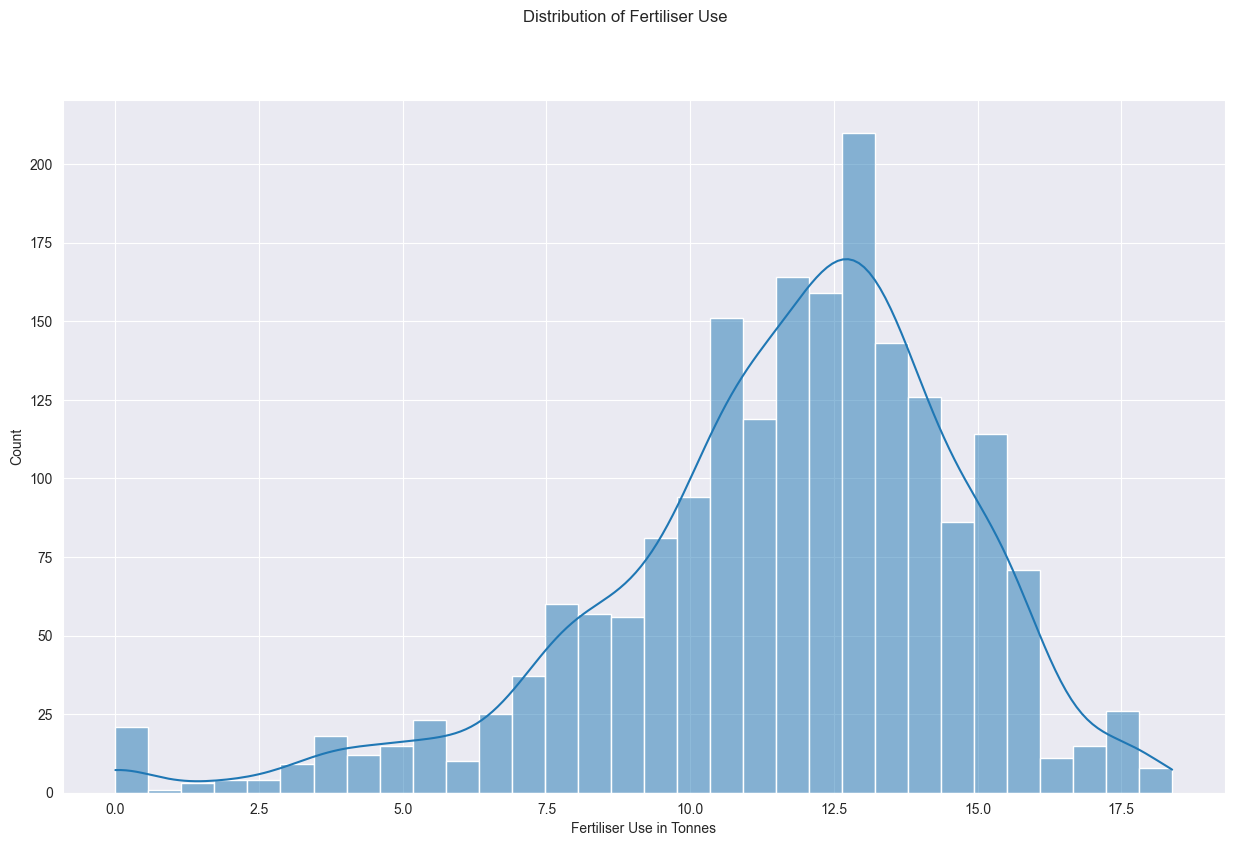

In [1468]:
# Plot the distribution of fertiliser use
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Distribution of Fertiliser Use")

sns.histplot(np.log1p(fertiliser_use_df['Total Fertiliser Use in Tonnes']), kde=True, ax=ax)
plt.xlabel("Fertiliser Use in Tonnes")

plt.show()

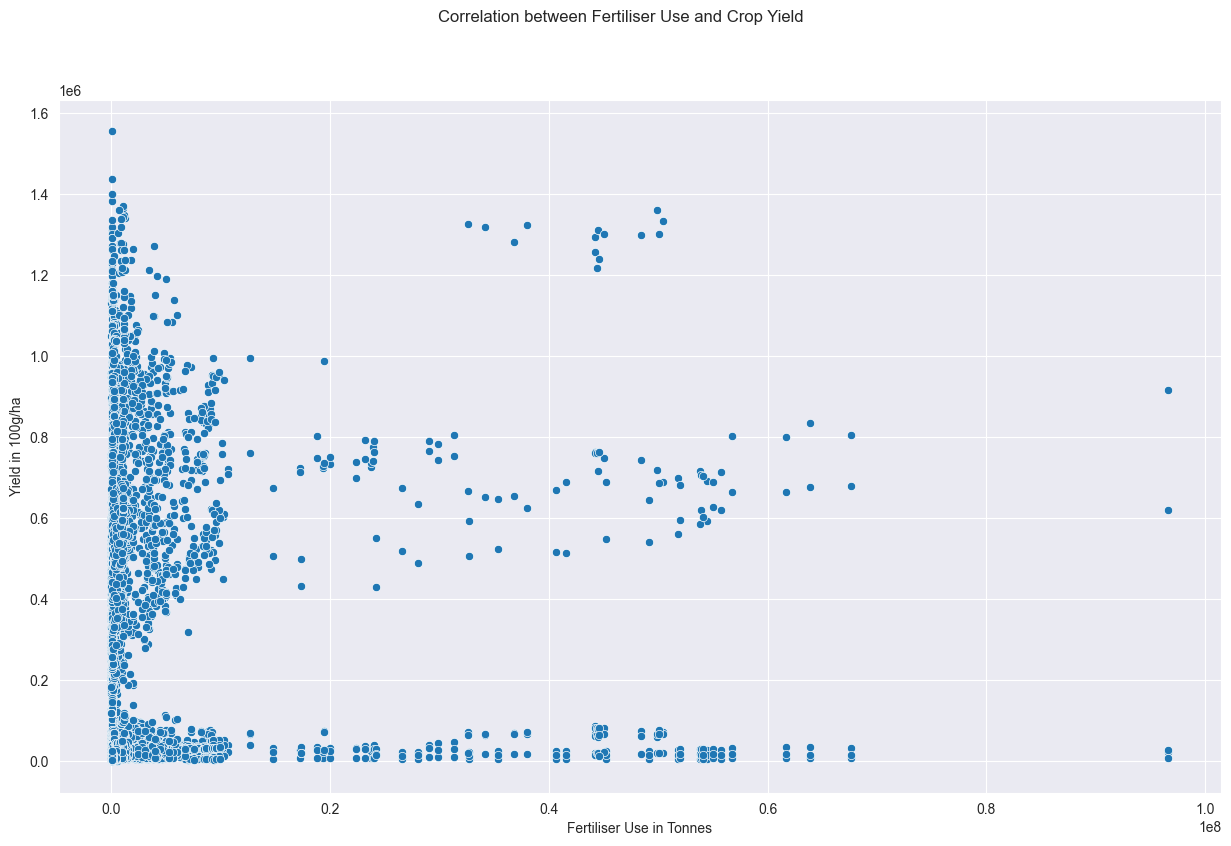

In [1469]:
# Plot the correlation between fertiliser use and crop yield
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Correlation between Fertiliser Use and Crop Yield")

sns.scatterplot(data=merged_df, x='Total Fertiliser Use in Tonnes', y='Yield in 100g/ha', ax=ax)
plt.xlabel("Fertiliser Use in Tonnes")
plt.ylabel("Yield in 100g/ha")

plt.show()

C:\Users\tomna\AppData\Local\Temp\ipykernel_33504\2212424403.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(x='Harmonised Item', y='Frequency', data=temp, ax=ax, palette='viridis')


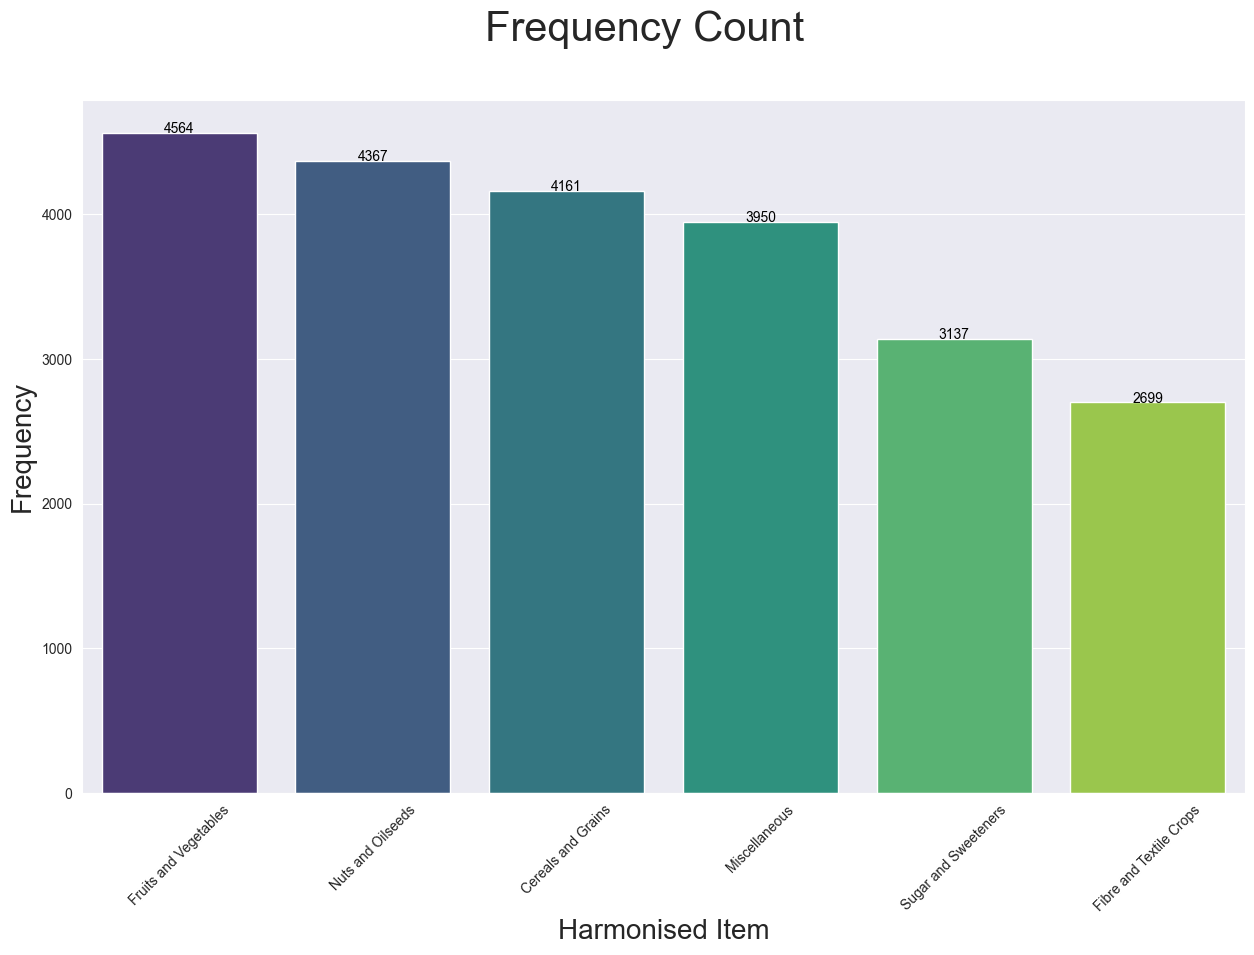

In [1470]:
# Count the values and reset the index
temp = crop_yield_df['Harmonised Item'].value_counts().reset_index()
temp.columns = ['Harmonised Item', 'Frequency']  # Correctly naming the columns for clarity

# Plotting
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Frequency Count', size=30)

# Using renamed columns
graph = sns.barplot(x='Harmonised Item', y='Frequency', data=temp, ax=ax, palette='viridis')

# Adding text labels on bars
for index, row in temp.iterrows():
    graph.text(index, row['Frequency'], row['Frequency'], color='black', ha="center")

plt.xlabel('Harmonised Item', size=20)
plt.ylabel('Frequency', size=20)
plt.xticks(rotation=45) # Rotating the x-axis labels for better visibility

plt.show()

## 4.3 Land Temperature Change Analysis

In this section, we will perform exploratory data analysis on the land temperature change data. We will explore the following:
- Mean land temperature change over the years for all countries
- Land temperature change distribution
- Land temperature change correlation with crop yield

In [1471]:
# Prepare the data for analysis
land_temperature_change_mean = land_temperature_change_df.groupby('Year')['Temperature Change in Degrees Celsius'].mean()
land_temperature_change_total = land_temperature_change_df.groupby('Year')['Temperature Change in Degrees Celsius'].sum()

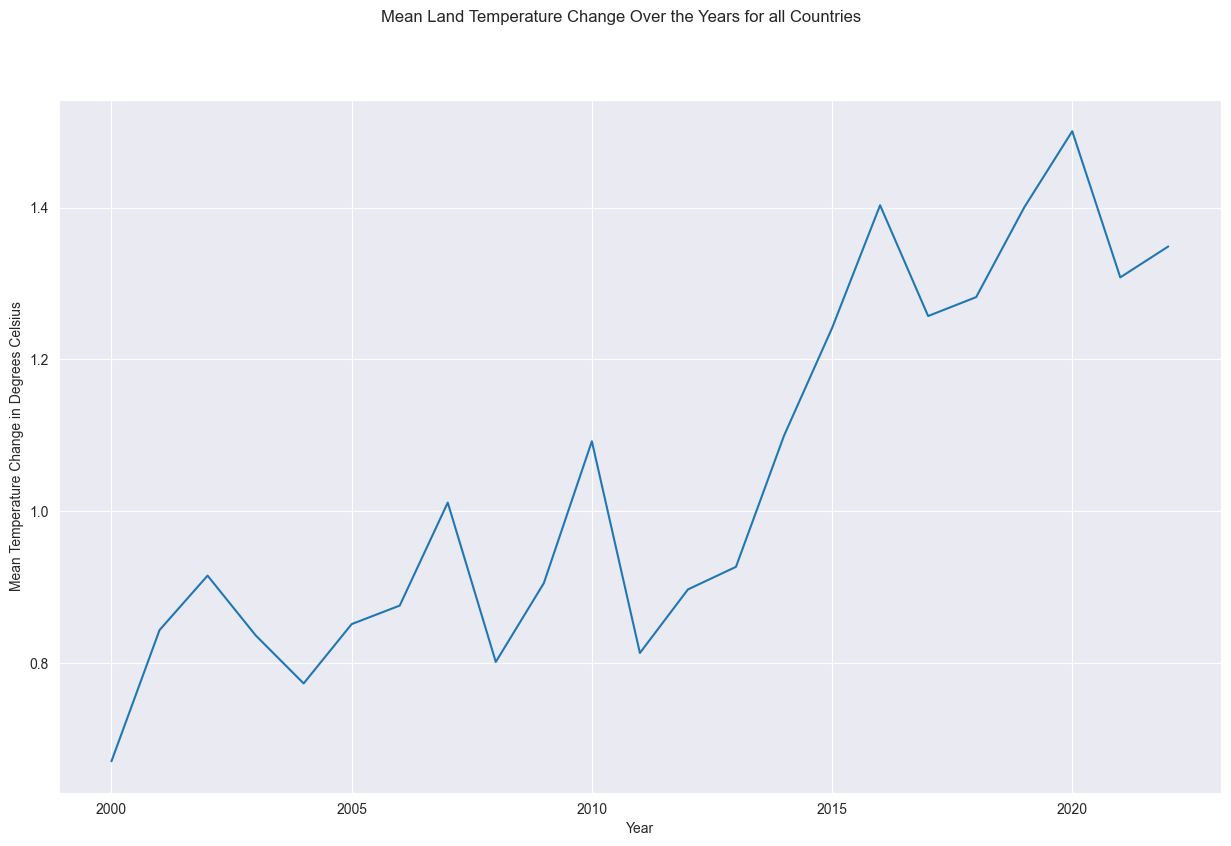

In [1472]:
# Plot the mean land temperature change over the years
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Mean Land Temperature Change Over the Years for all Countries")

land_temperature_change_mean.plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Mean Temperature Change in Degrees Celsius")

plt.show()

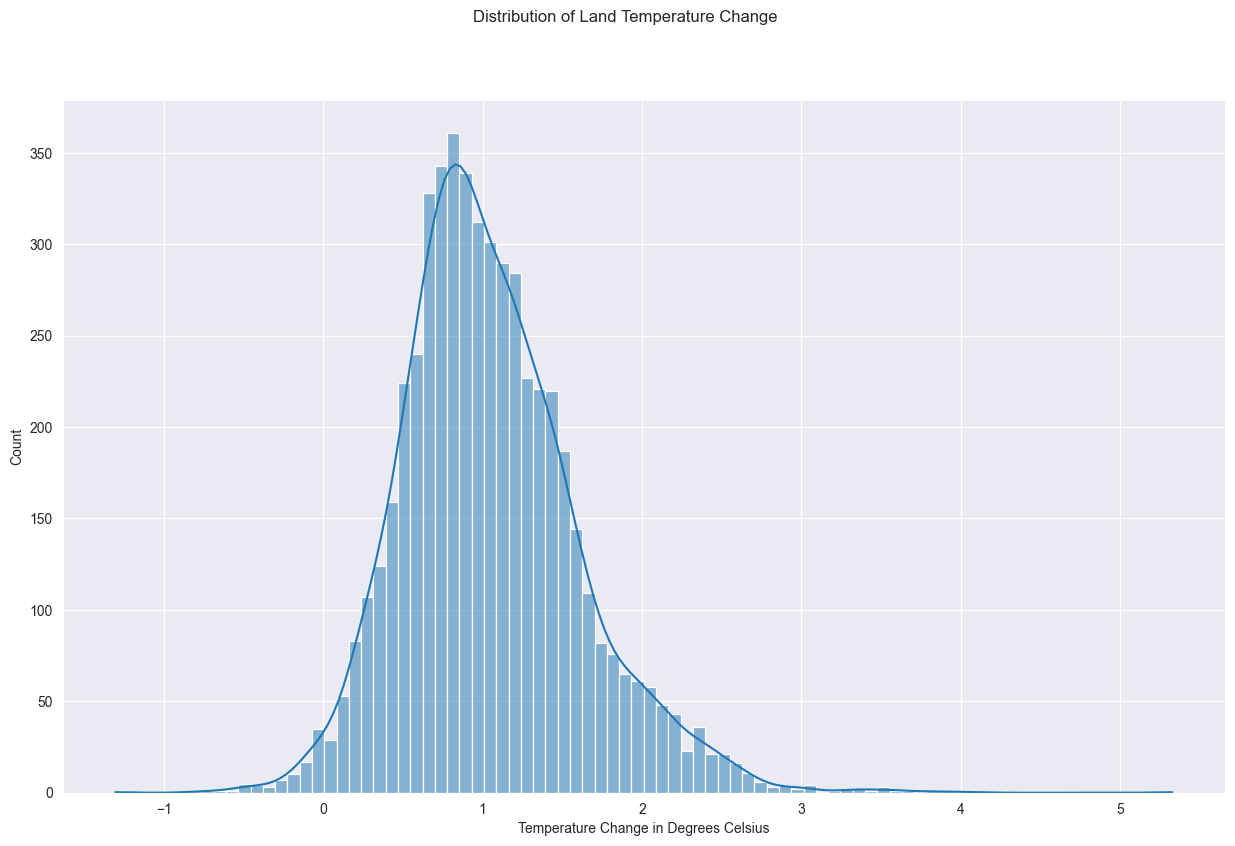

In [1473]:
# Plot the distribution of land temperature change
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Distribution of Land Temperature Change")

sns.histplot(land_temperature_change_df['Temperature Change in Degrees Celsius'], kde=True, ax=ax)
plt.xlabel("Temperature Change in Degrees Celsius")

plt.show()

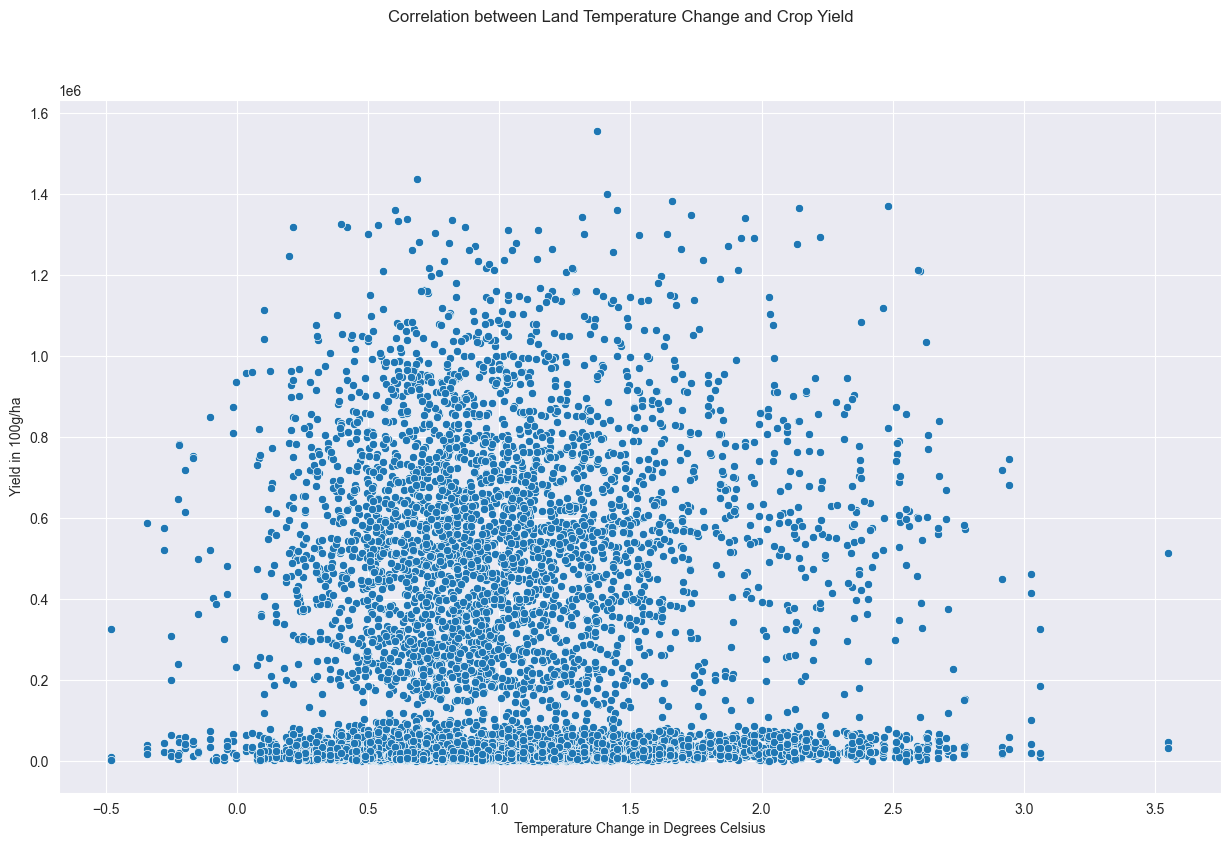

In [1474]:
# Plot the correlation between land temperature change and crop yield
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Correlation between Land Temperature Change and Crop Yield")

sns.scatterplot(data=merged_df, x='Temperature Change in Degrees Celsius', y='Yield in 100g/ha', ax=ax)
plt.xlabel("Temperature Change in Degrees Celsius")
plt.ylabel("Yield in 100g/ha")

plt.show()

## 4.4 Pesticides Use Analysis

In this section, we will perform exploratory data analysis on the pesticides use data. We will explore the following:
- Mean pesticides use over the years for all countries
- Distribution of pesticides use
- Pesticides use correlation with crop yield

In [1475]:
# Prepare the data for analysis
pesticides_use_mean = pesticides_use_df.groupby('Year')['Total Pesticides Use in Tonnes'].mean()
pesticides_use_total = pesticides_use_df.groupby('Year')['Total Pesticides Use in Tonnes'].sum()

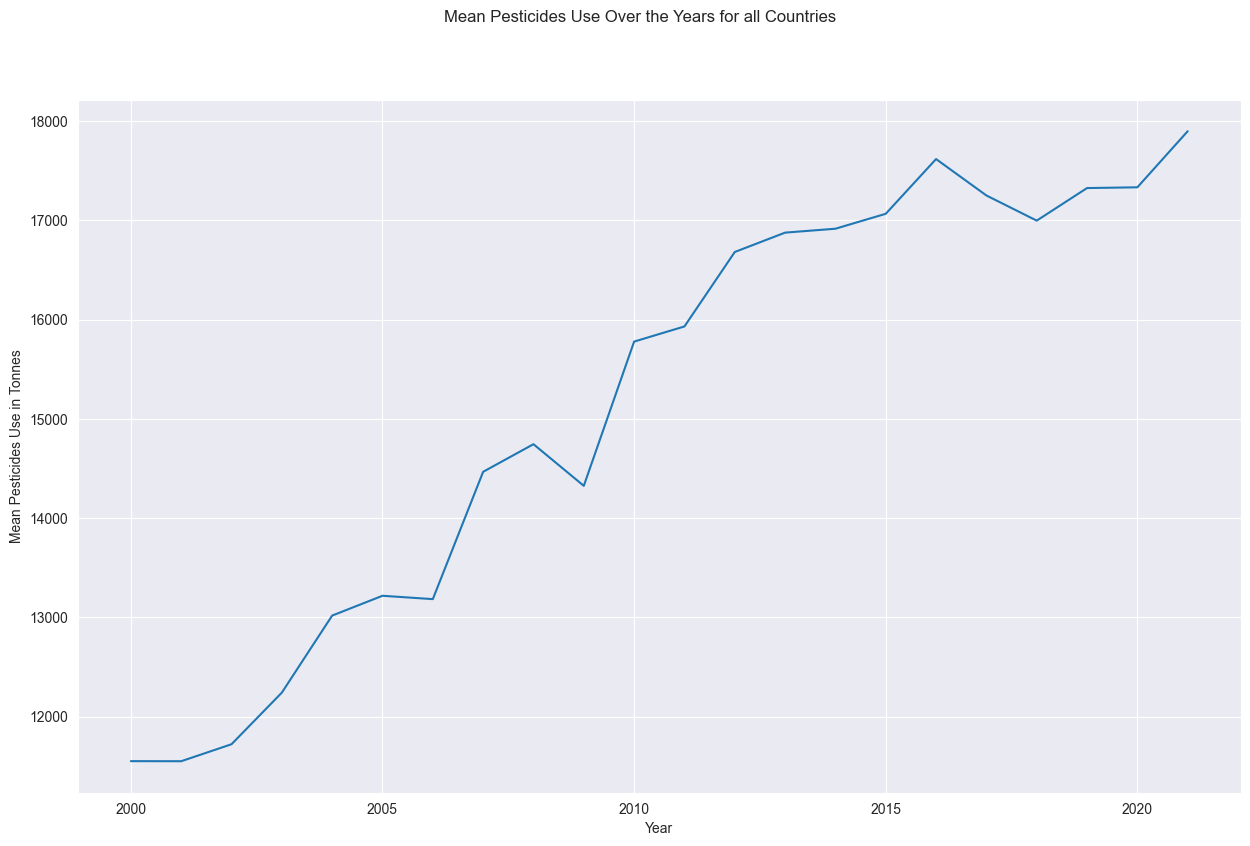

In [1476]:
# Plot the mean pesticides use over the years
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Mean Pesticides Use Over the Years for all Countries")

pesticides_use_mean.plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Mean Pesticides Use in Tonnes")

plt.show()

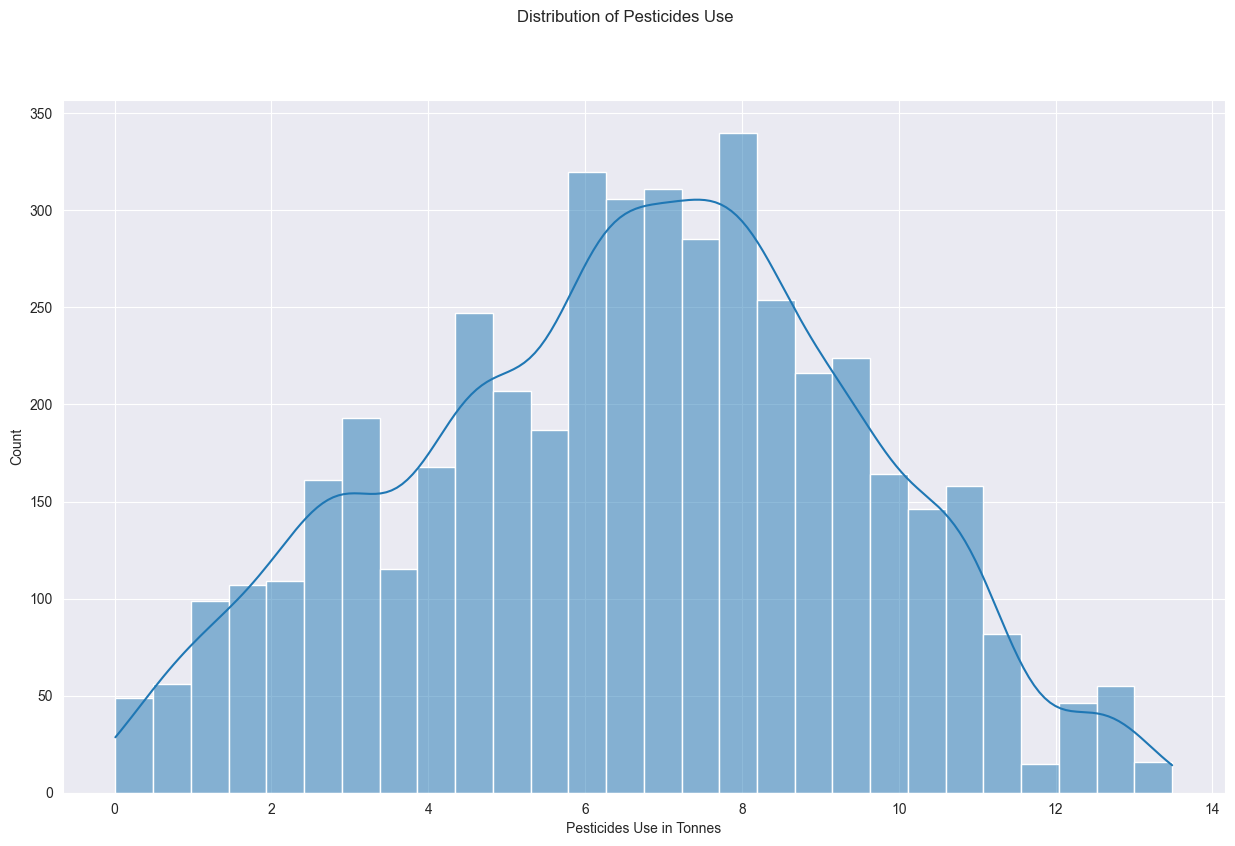

In [1477]:
# Plot the distribution of pesticides use
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Distribution of Pesticides Use")

sns.histplot(np.log1p(pesticides_use_df['Total Pesticides Use in Tonnes']), kde=True, ax=ax)
plt.xlabel("Pesticides Use in Tonnes")

plt.show()

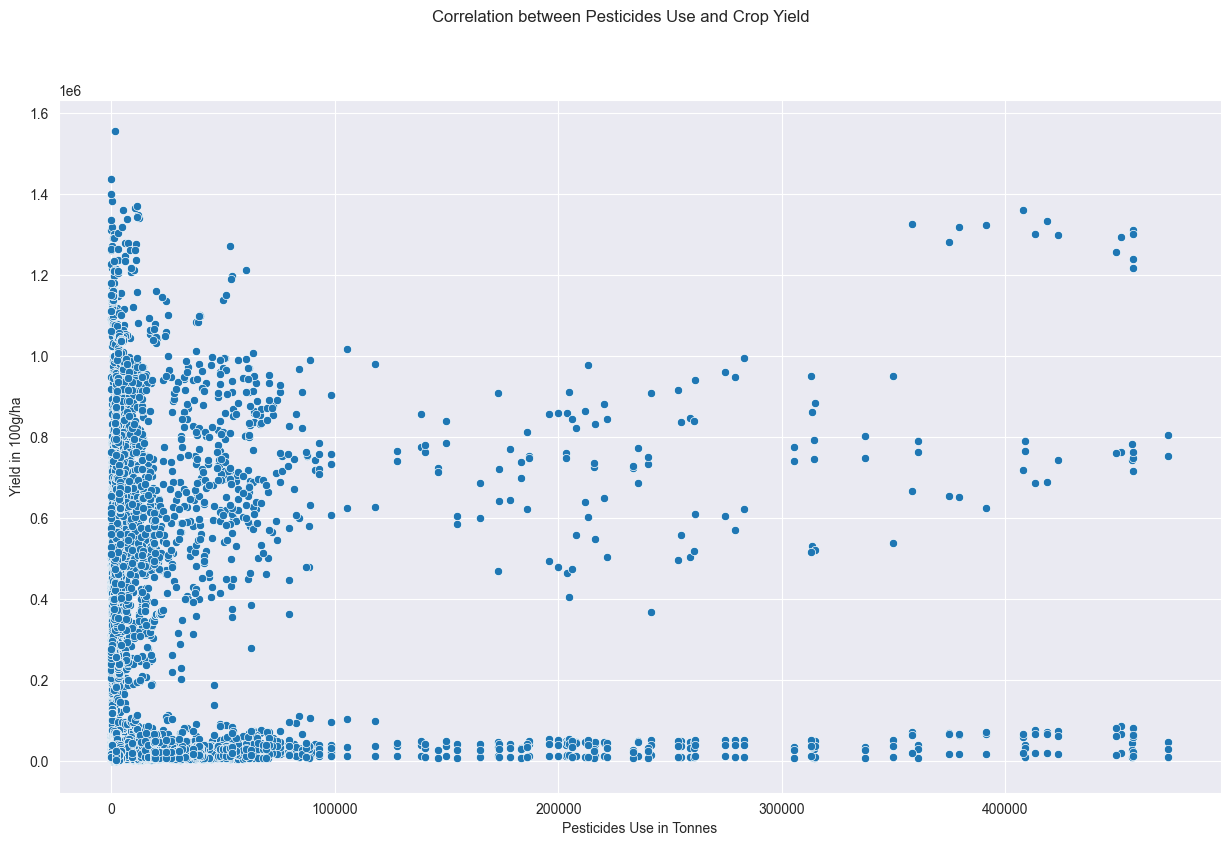

In [1478]:
# Plot the correlation between pesticides use and crop yield
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Correlation between Pesticides Use and Crop Yield")

sns.scatterplot(data=merged_df, x='Total Pesticides Use in Tonnes', y='Yield in 100g/ha', ax=ax)
plt.xlabel("Pesticides Use in Tonnes")
plt.ylabel("Yield in 100g/ha")

plt.show()

### 4.5 Crop Value Analysis

In this section, we will perform exploratory data analysis on the crop value data (both import and export). We will explore the following:
- Mean crop value over the years for all countries by crop type
- Distribution of crop value (non-zero values only)
- Crop value correlation with crop yield
- Frequency of harmonised items

In [1479]:
# Prepare the data for analysis
crop_value_exports_mean = crop_value_exports_df.groupby(['Year', 'Harmonised Item'])['Total Export Crop Value in 1000 US$'].mean()
crop_value_imports_mean = crop_value_imports_df.groupby(['Year', 'Harmonised Item'])['Total Import Crop Value in 1000 US$'].mean()
non_zero_crop_value_exports = crop_value_exports_df[crop_value_exports_df['Total Export Crop Value in 1000 US$'] > 0]
non_zero_crop_value_imports = crop_value_imports_df[crop_value_imports_df['Total Import Crop Value in 1000 US$'] > 0]

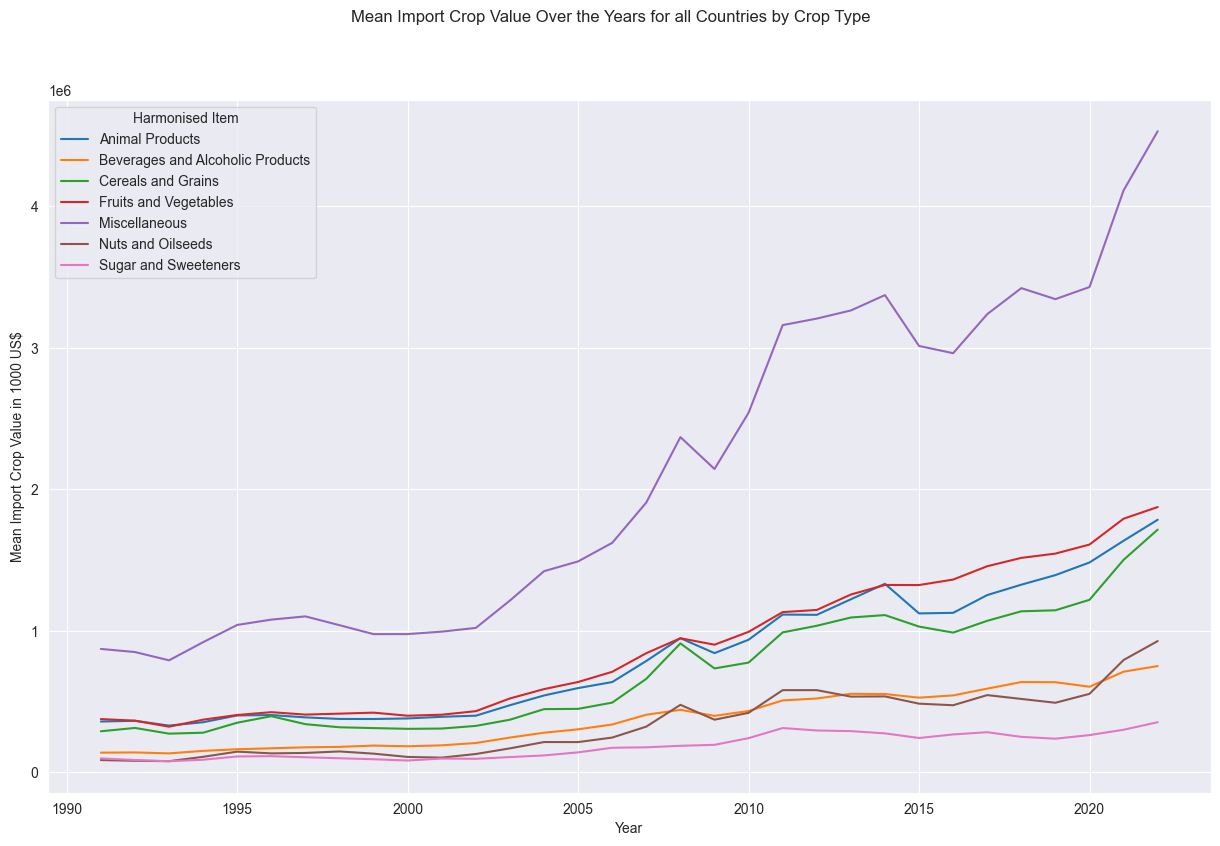

In [1480]:
# Plot the mean import crop value over the years
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Mean Import Crop Value Over the Years for all Countries by Crop Type")

crop_value_imports_mean.unstack().plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Mean Import Crop Value in 1000 US$")
plt.show()

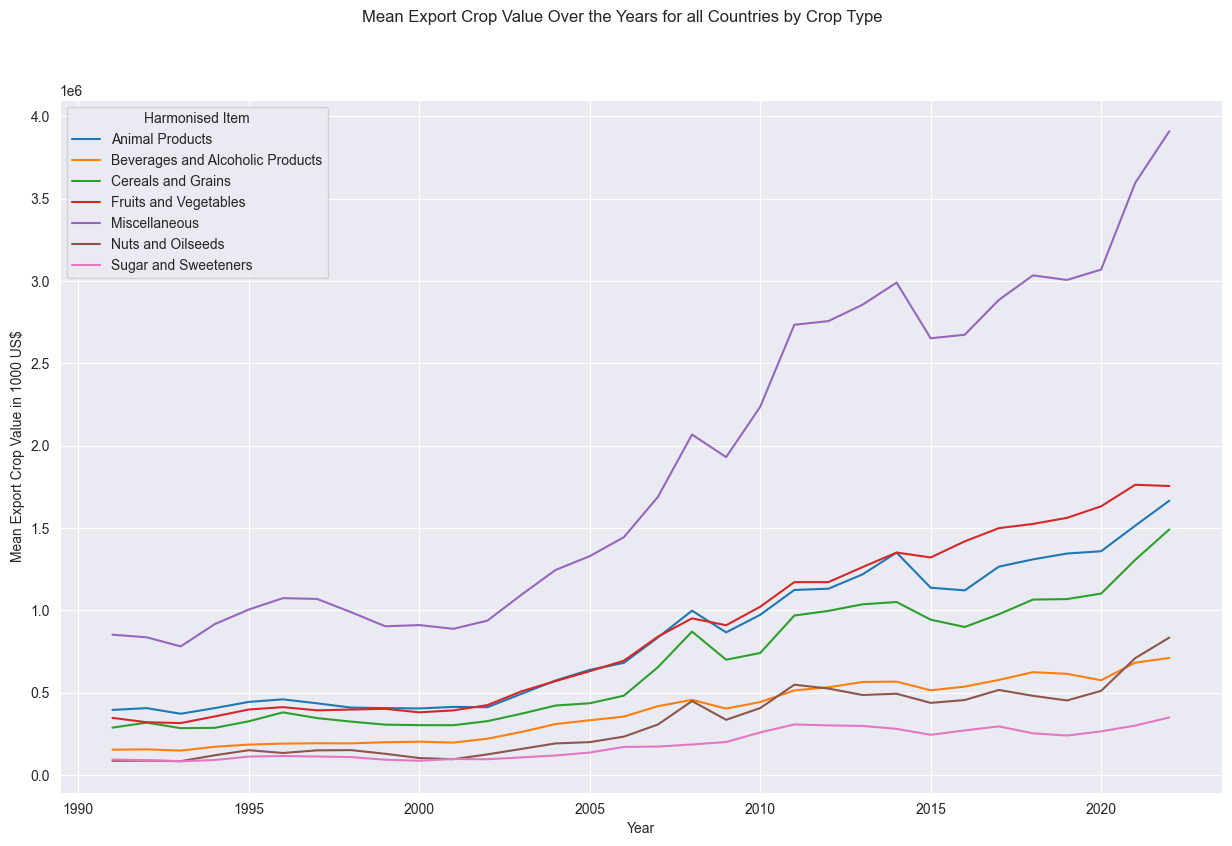

In [1481]:
# Plot the mean export crop value over the years
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Mean Export Crop Value Over the Years for all Countries by Crop Type")

crop_value_exports_mean.unstack().plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Mean Export Crop Value in 1000 US$")
plt.show()

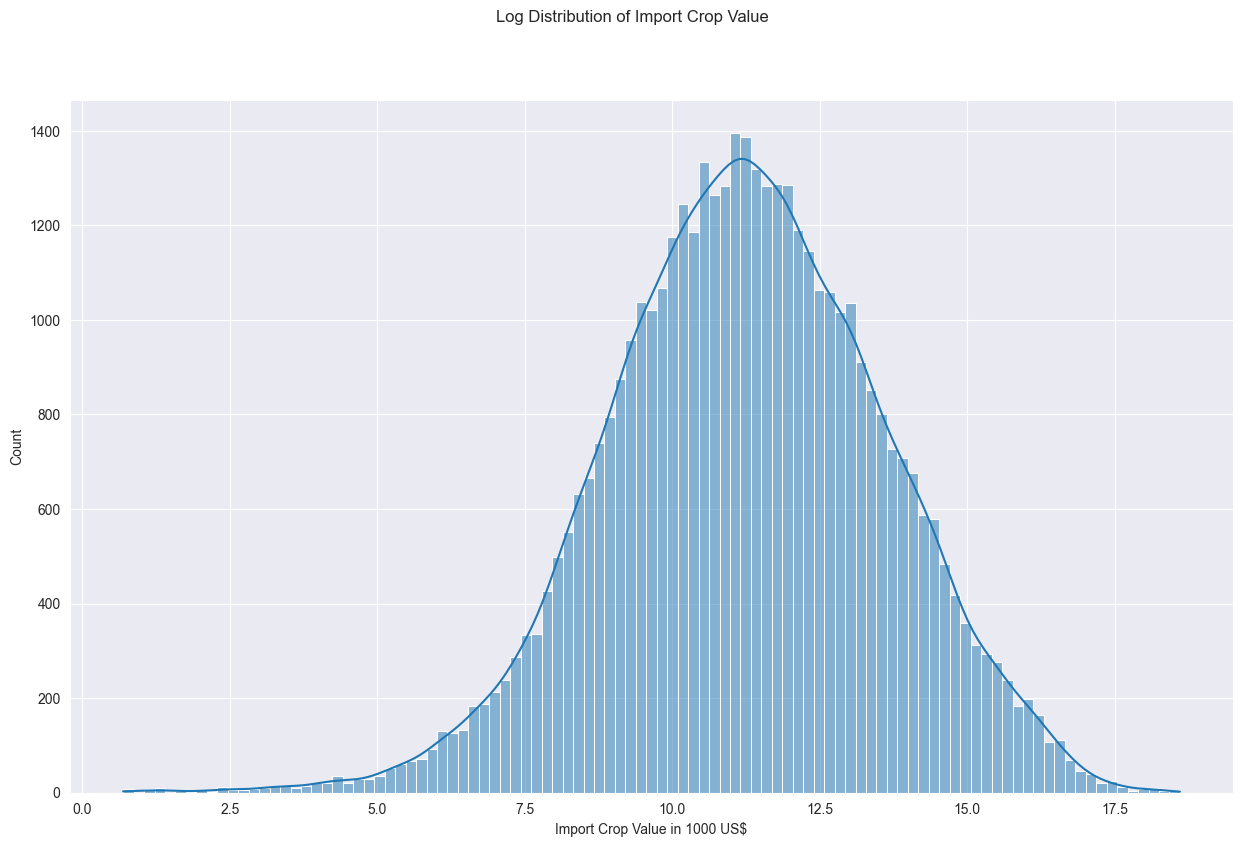

In [1482]:
# Plot the log1p distribution of import crop value
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Log Distribution of Import Crop Value")

sns.histplot(np.log1p(non_zero_crop_value_imports['Total Import Crop Value in 1000 US$']), kde=True, ax=ax)
plt.xlabel("Import Crop Value in 1000 US$")
plt.show()

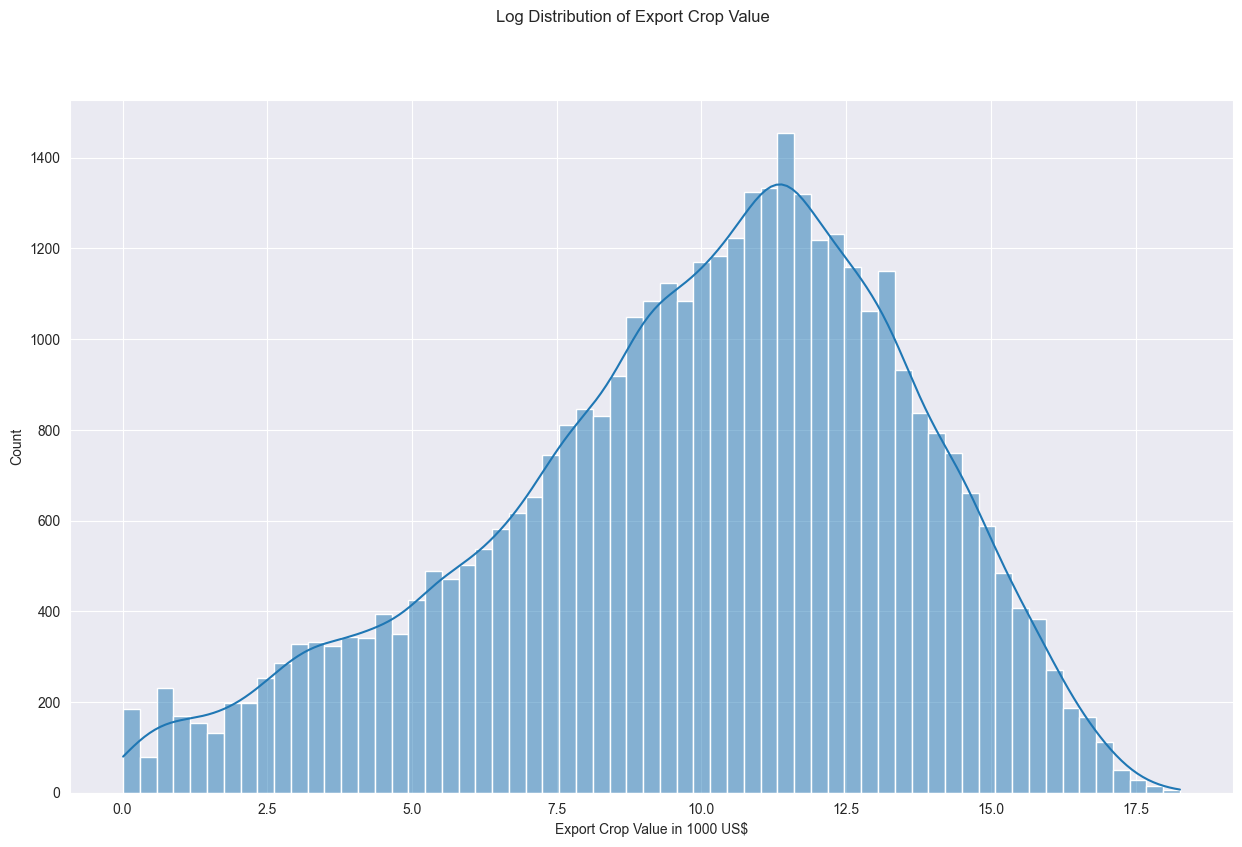

In [1483]:
# Plot the log1p distribution of export crop value
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Log Distribution of Export Crop Value")

sns.histplot(np.log1p(non_zero_crop_value_exports['Total Export Crop Value in 1000 US$']), kde=True, ax=ax)
plt.xlabel("Export Crop Value in 1000 US$")
plt.show()

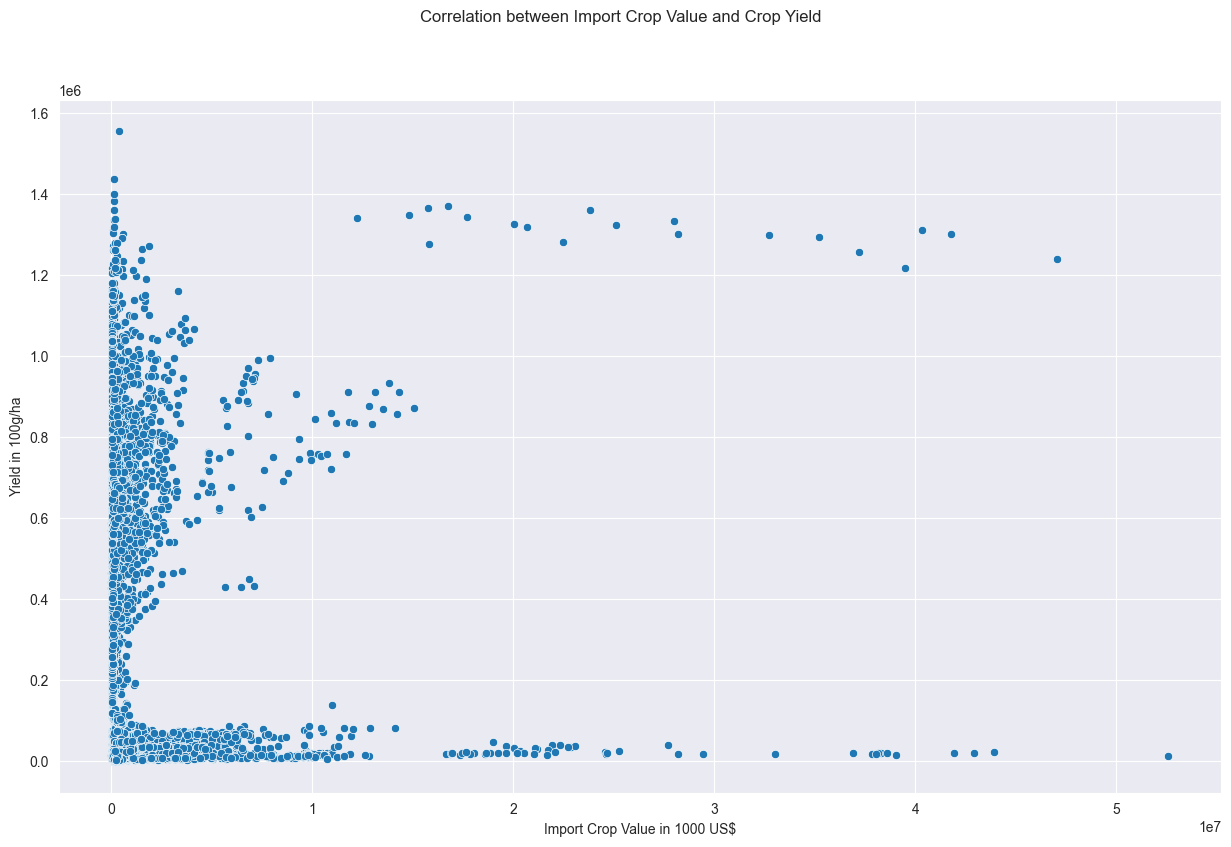

In [1484]:
# Plot the correlation between import crop value and crop yield
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Correlation between Import Crop Value and Crop Yield")

sns.scatterplot(data=merged_df, x='Total Import Crop Value in 1000 US$', y='Yield in 100g/ha', ax=ax)
plt.xlabel("Import Crop Value in 1000 US$")
plt.ylabel("Yield in 100g/ha")
plt.show()

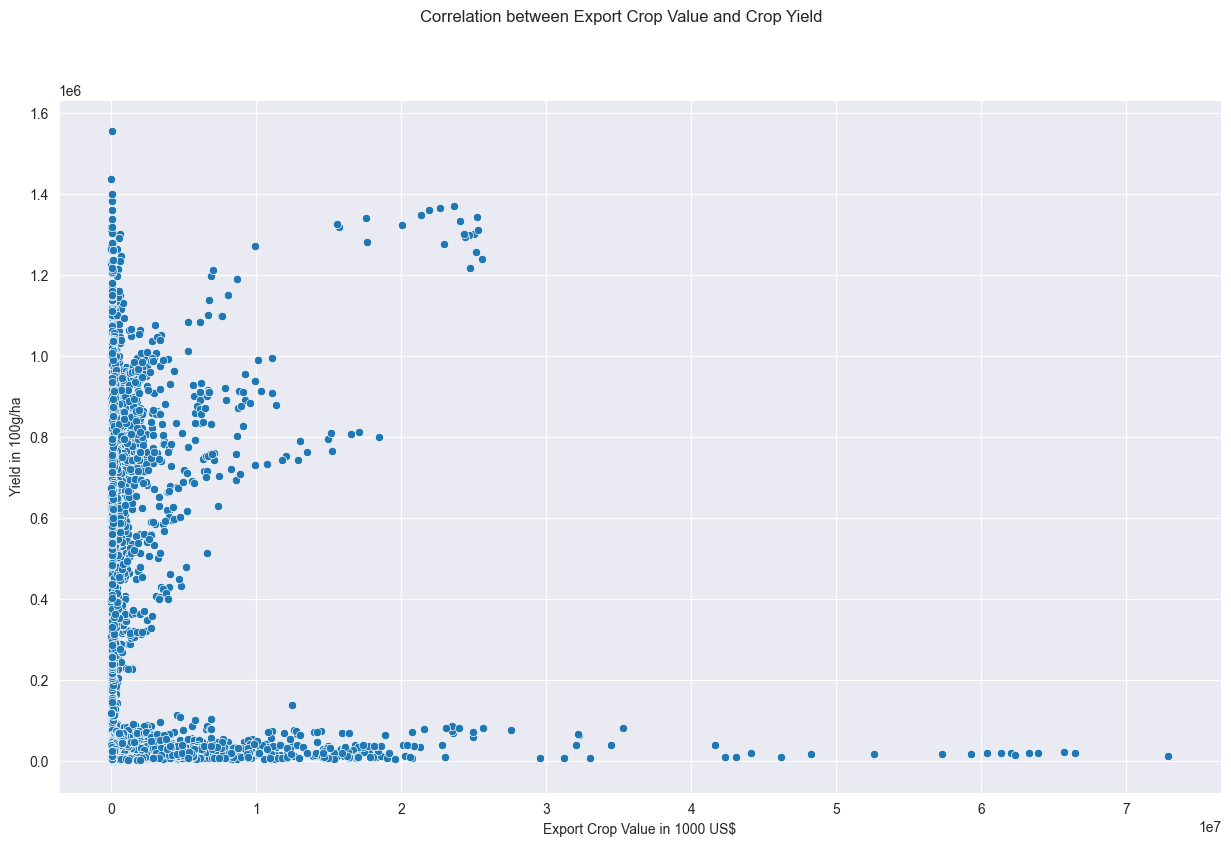

In [1485]:
# Plot the correlation between export crop value and crop yield
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Correlation between Export Crop Value and Crop Yield")

sns.scatterplot(data=merged_df, x='Total Export Crop Value in 1000 US$', y='Yield in 100g/ha', ax=ax)
plt.xlabel("Export Crop Value in 1000 US$")
plt.ylabel("Yield in 100g/ha")
plt.show()

C:\Users\tomna\AppData\Local\Temp\ipykernel_33504\1462921276.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(x='Harmonised Item', y='Frequency', data=temp, ax=ax, palette='viridis')


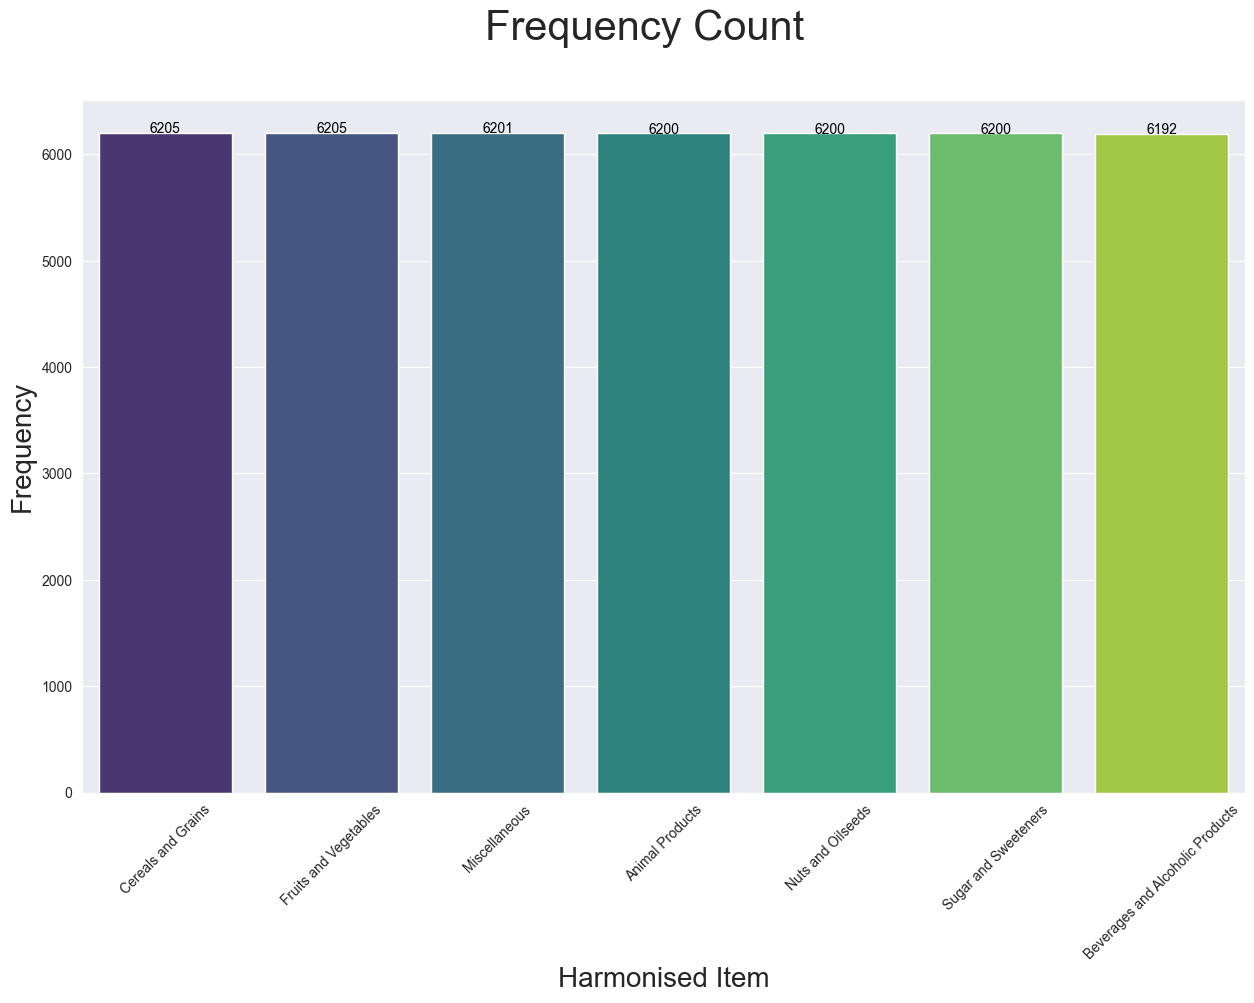

In [1486]:
# Count the values and reset the index
temp = crop_value_imports_df['Harmonised Item'].value_counts().reset_index()
temp.columns = ['Harmonised Item', 'Frequency']  # Correctly naming the columns for clarity

# Plotting
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Frequency Count', size=30)

# Using renamed columns
graph = sns.barplot(x='Harmonised Item', y='Frequency', data=temp, ax=ax, palette='viridis')

# Adding text labels on bars
for index, row in temp.iterrows():
    graph.text(index, row['Frequency'], row['Frequency'], color='black', ha="center")

plt.xlabel('Harmonised Item', size=20)
plt.ylabel('Frequency', size=20)
plt.xticks(rotation=45) # Rotating the x-axis labels for better visibility

plt.show()

C:\Users\tomna\AppData\Local\Temp\ipykernel_33504\3809287263.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(x='Harmonised Item', y='Frequency', data=temp, ax=ax, palette='viridis')


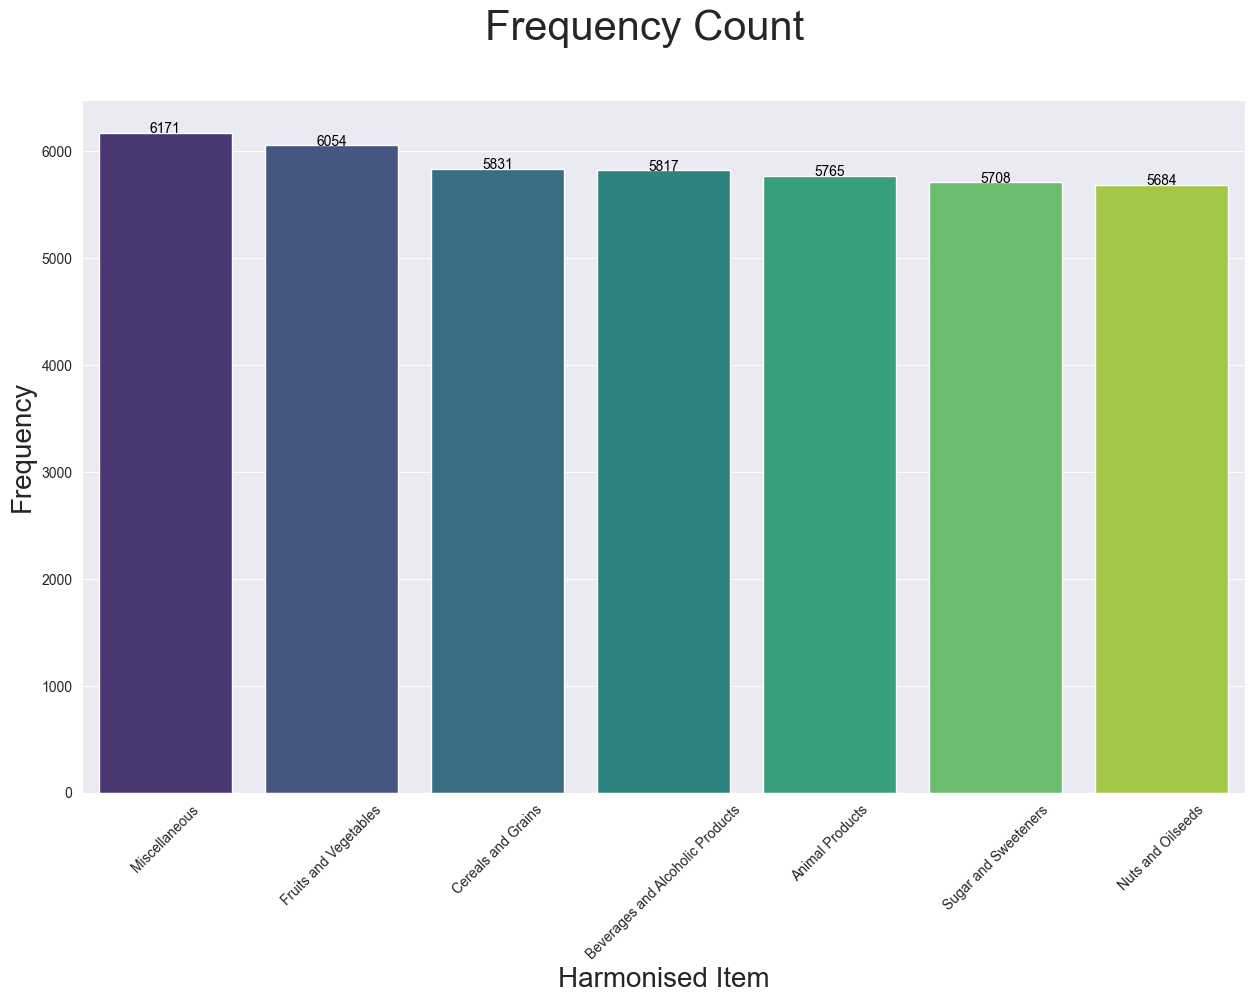

In [1487]:
# Count the values and reset the index
temp = crop_value_exports_df['Harmonised Item'].value_counts().reset_index()
temp.columns = ['Harmonised Item', 'Frequency']  # Correctly naming the columns for clarity

# Plotting
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Frequency Count', size=30)

# Using renamed columns
graph = sns.barplot(x='Harmonised Item', y='Frequency', data=temp, ax=ax, palette='viridis')

# Adding text labels on bars
for index, row in temp.iterrows():
    graph.text(index, row['Frequency'], row['Frequency'], color='black', ha="center")

plt.xlabel('Harmonised Item', size=20)
plt.ylabel('Frequency', size=20)
plt.xticks(rotation=45) # Rotating the x-axis labels for better visibility

plt.show()

## 4.6 Land Use Analysis

In this section, we will perform exploratory data analysis on the land use data. We will explore the following:
- Mean agricultural land over the years for all countries
- Total agricultural land over the years for all countries
- Agricultural land distribution
- Agricultural land correlation with crop yield

In [1488]:
# Prepare the data for analysis
land_use_mean = land_use_df.groupby('Year')['Agricultural Land in Hectares'].mean()
land_use_total = land_use_df.groupby('Year')['Agricultural Land in Hectares'].sum()
non_zero_land_use = land_use_df[land_use_df['Agricultural Land in Hectares'] > 0]

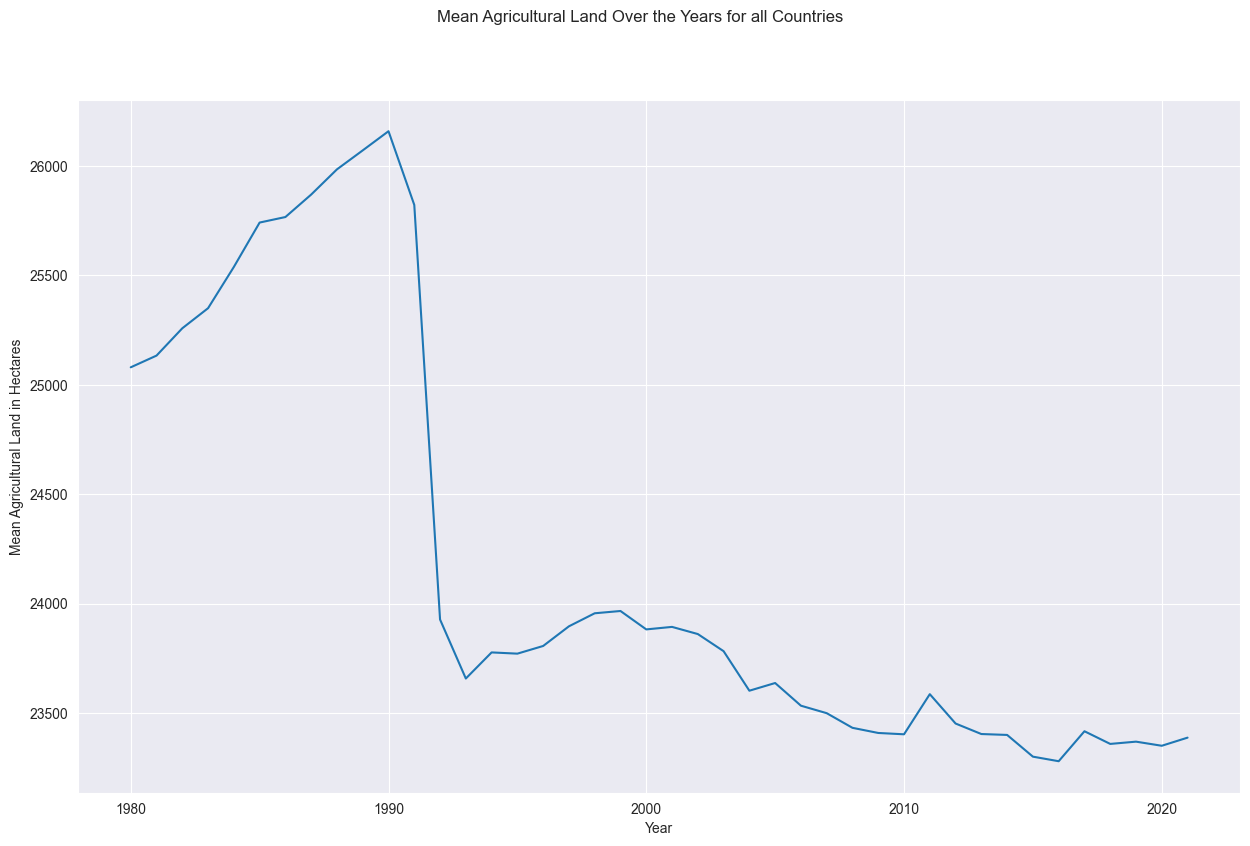

In [1489]:
# Plot the mean agricultural land over the years
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Mean Agricultural Land Over the Years for all Countries")

land_use_mean.plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Mean Agricultural Land in Hectares")
plt.show()

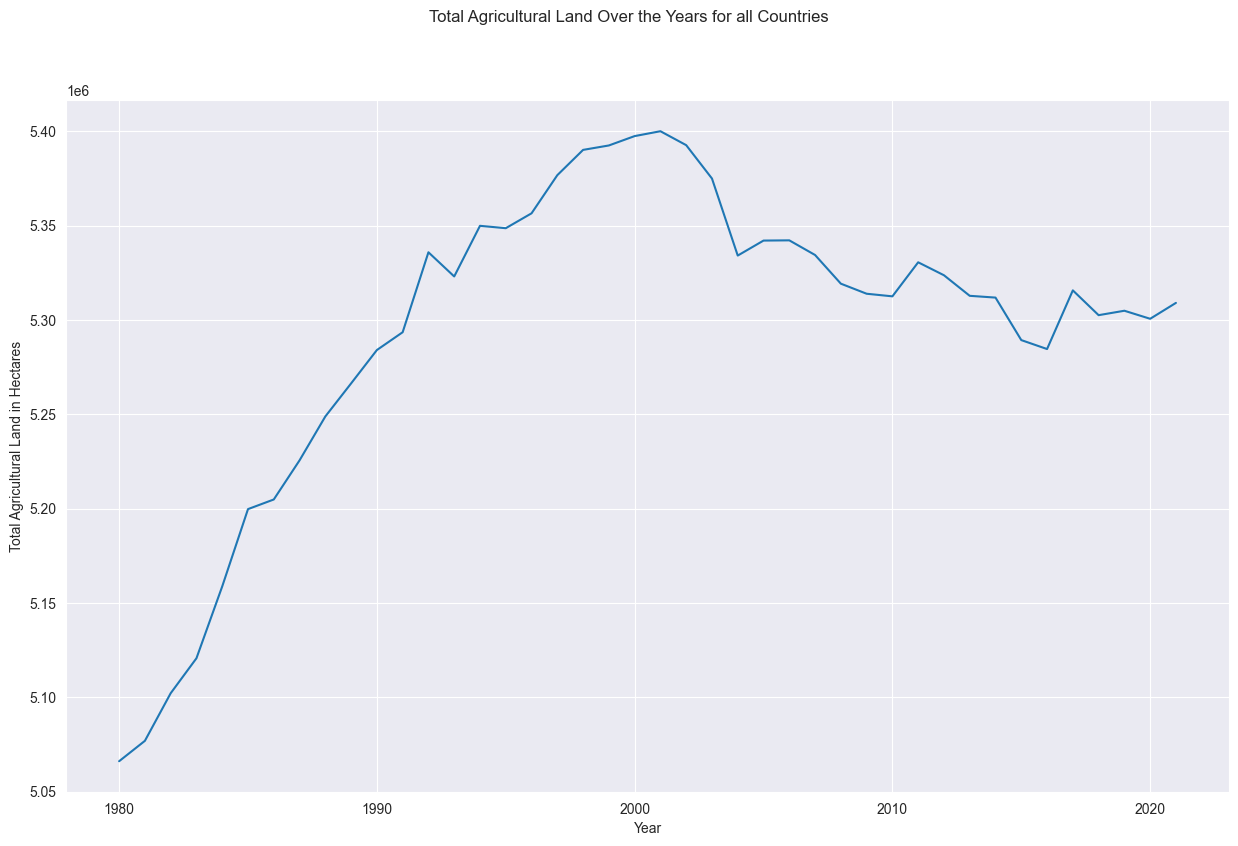

In [1490]:
# Plot the total agricultural land over the years
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Total Agricultural Land Over the Years for all Countries")

land_use_total.plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Total Agricultural Land in Hectares")
plt.show()

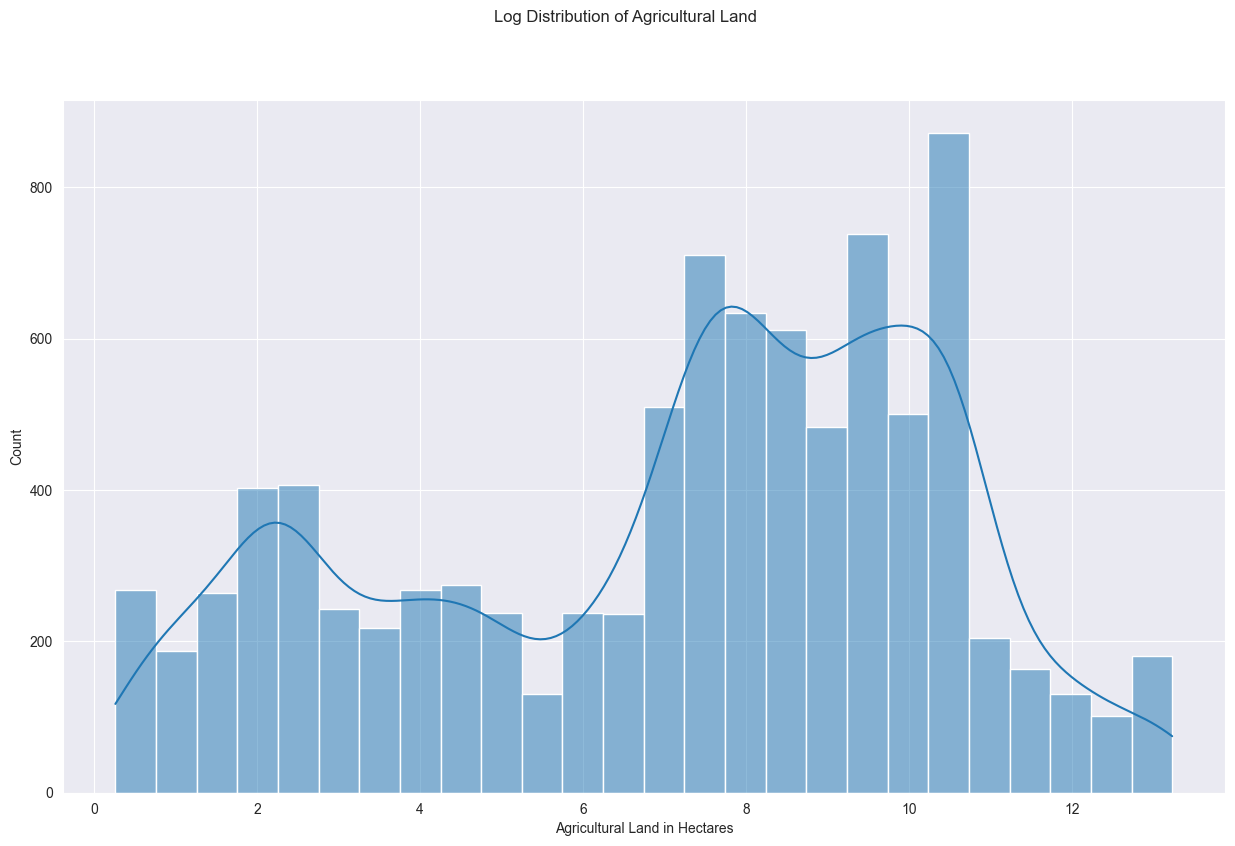

In [1491]:
# Plot the distribution of agricultural land
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Log Distribution of Agricultural Land")

sns.histplot(np.log1p(non_zero_land_use['Agricultural Land in Hectares']), kde=True, ax=ax)
plt.xlabel("Agricultural Land in Hectares")
plt.show()

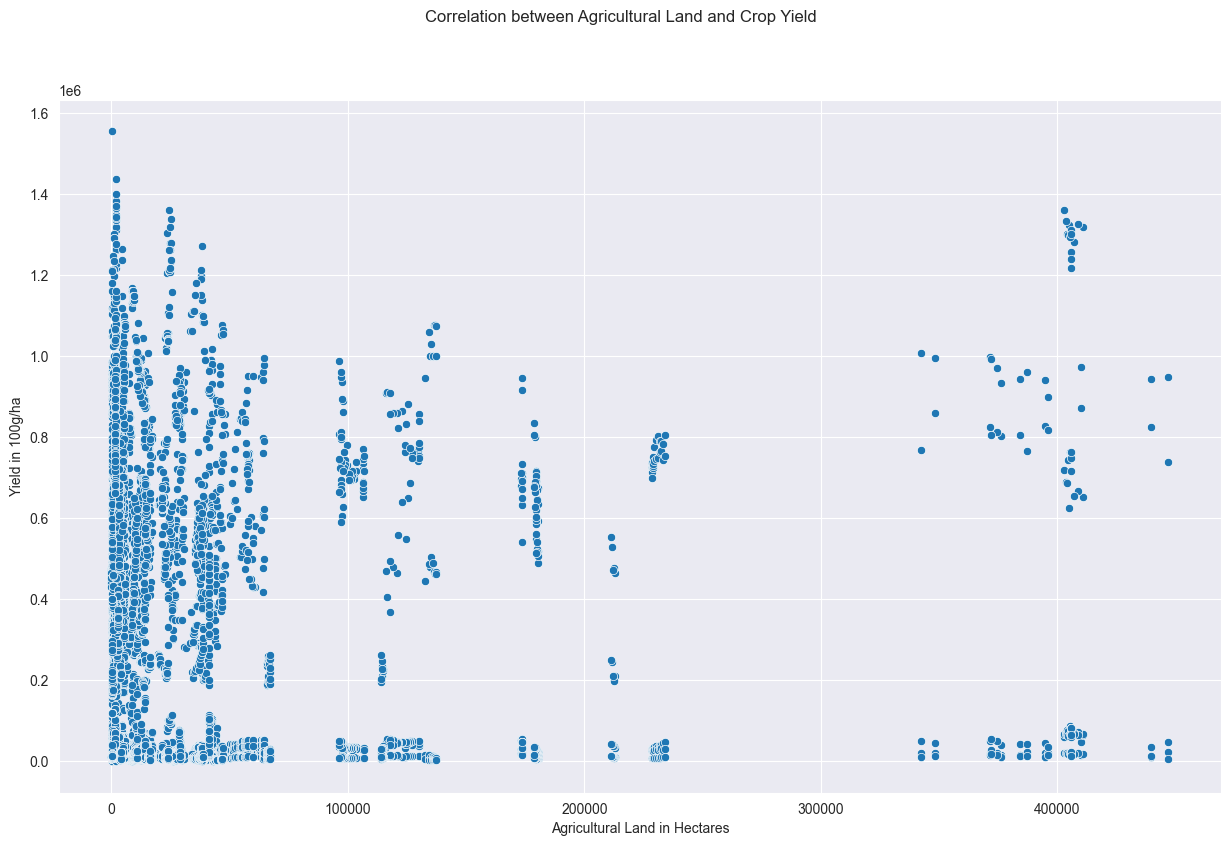

In [1492]:
# Plot the correlation between agricultural land and crop yield
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Correlation between Agricultural Land and Crop Yield")

sns.scatterplot(data=merged_df, x='Agricultural Land in Hectares', y='Yield in 100g/ha', ax=ax)
plt.xlabel("Agricultural Land in Hectares")
plt.ylabel("Yield in 100g/ha")
plt.show()

## 4.7 Merged Data Analysis

In this section, we will perform exploratory data analysis on the merged data. We will explore the following:
- Frequency of harmonised items
- Correlation analysis

## 4.7.1 Frequency of Harmonised Items

C:\Users\tomna\AppData\Local\Temp\ipykernel_33504\786852473.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(x='Harmonised Item', y='Frequency', data=temp, ax=ax, palette='viridis')


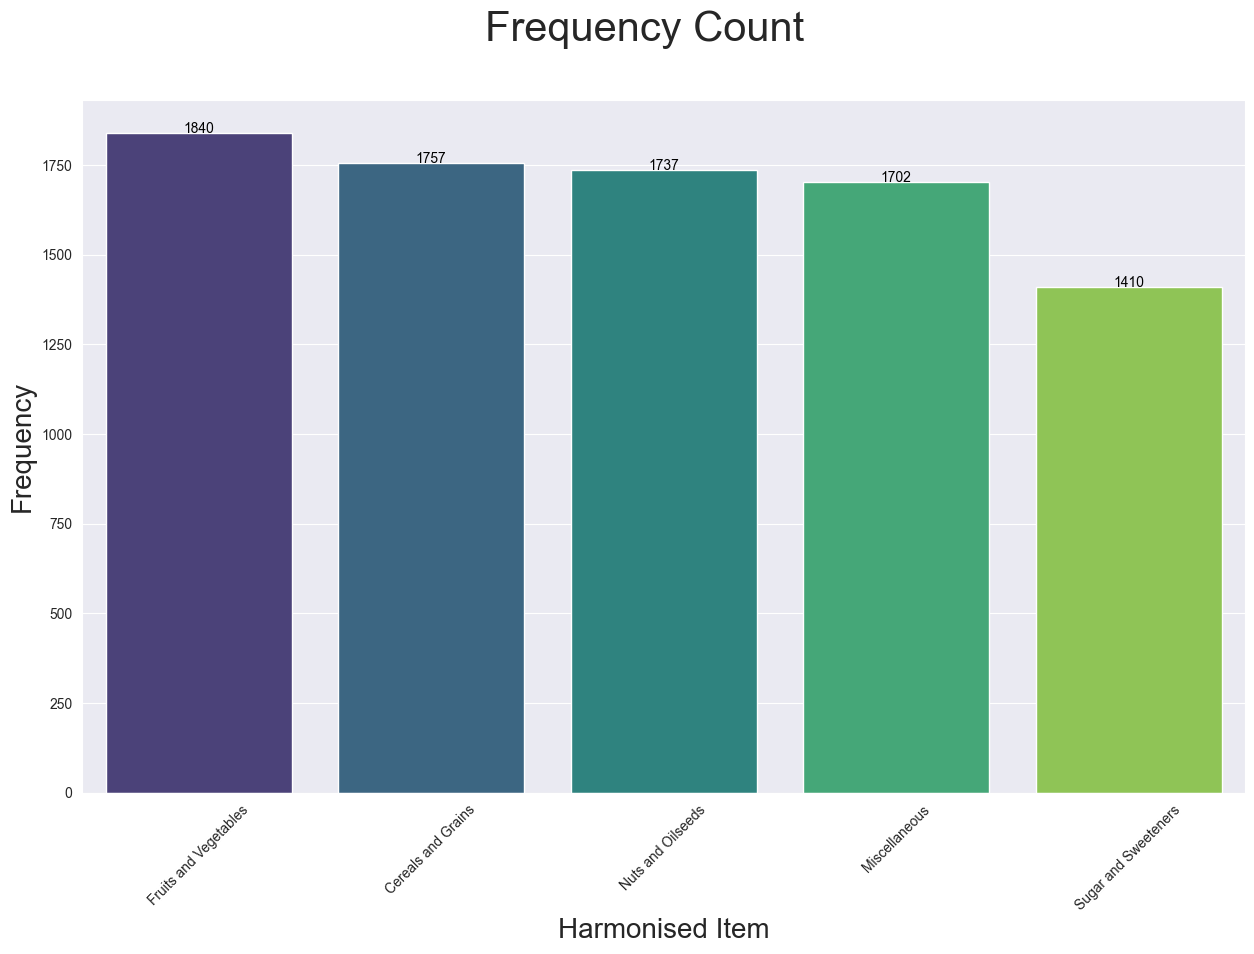

In [1493]:
# Count the values and reset the index
temp = merged_df['Harmonised Item'].value_counts().reset_index()
temp.columns = ['Harmonised Item', 'Frequency']  # Correctly naming the columns for clarity

# Plotting
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Frequency Count', size=30)

# Using renamed columns
graph = sns.barplot(x='Harmonised Item', y='Frequency', data=temp, ax=ax, palette='viridis')

# Adding text labels on bars
for index, row in temp.iterrows():
    graph.text(index, row['Frequency'], row['Frequency'], color='black', ha="center")   

plt.xlabel('Harmonised Item', size=20)
plt.ylabel('Frequency', size=20)
plt.xticks(rotation=45) # Rotating the x-axis labels for better visibility

plt.show()

## 4.7.2 Correlation Analysis

In this section, we will perform correlation analysis on the merged data. We will generate a correlation matrix and plot a heatmap to visualise the correlations between the variables.

In [1494]:
# Generate a correlation matrix
correlation_matrix = merged_df.select_dtypes(include=[np.number]).corr()
correlation_matrix

,Year,Area Code (M49)_x,Yield in 100g/ha,Total Export Crop Value in 1000 US$,Total Import Crop Value in 1000 US$,Temperature Change in Degrees Celsius,Total Pesticides Use in Tonnes,Agricultural Land in Hectares,Area Code (M49)_y,Total Fertiliser Use in Tonnes
Year,1.000000,-0.025436,0.074925,0.174290,0.205743,0.423734,0.118691,0.029097,-0.030878,0.136932
Area Code (M49)_x,-0.025436,1.000000,0.224964,-0.004048,0.018722,-0.019269,-0.003621,0.013934,0.645188,0.030579
Yield in 100g/ha,0.074925,0.224964,1.000000,0.005384,0.015593,0.019770,0.093243,0.072052,0.018993,0.069341
Total Export Crop Value in 1000 US$,0.174290,-0.004048,0.005384,1.000000,0.729646,0.048989,0.603918,0.461051,0.025347,0.455291
Total Import Crop Value in 1000 US$,0.205743,0.018722,0.015593,0.729646,1.000000,0.103011,0.473265,0.382416,0.075188,0.413324
Temperature Change in Degrees Celsius,0.423734,-0.019269,0.019770,0.048989,0.103011,1.000000,-0.046194,-0.048991,0.006144,-0.036543
Total Pesticides Use in Tonnes,0.118691,-0.003621,0.093243,0.603918,0.473265,-0.046194,1.000000,0.644944,-0.016726,0.579970
Agricultural Land in Hectares,0.029097,0.013934,0.072052,0.461051,0.382416,-0.048991,0.644944,1.000000,0.010357,0.604305
Area Code (M49)_y,-0.030878,0.645188,0.018993,0.025347,0.075188,0.006144,-0.016726,0.010357,1.000000,0.037834
Total Fertiliser Use in Tonnes,0.136932,0.030579,0.069341,0.455291,0.413324,-0.036543,0.579970,0.604305,0.037834,1.000000


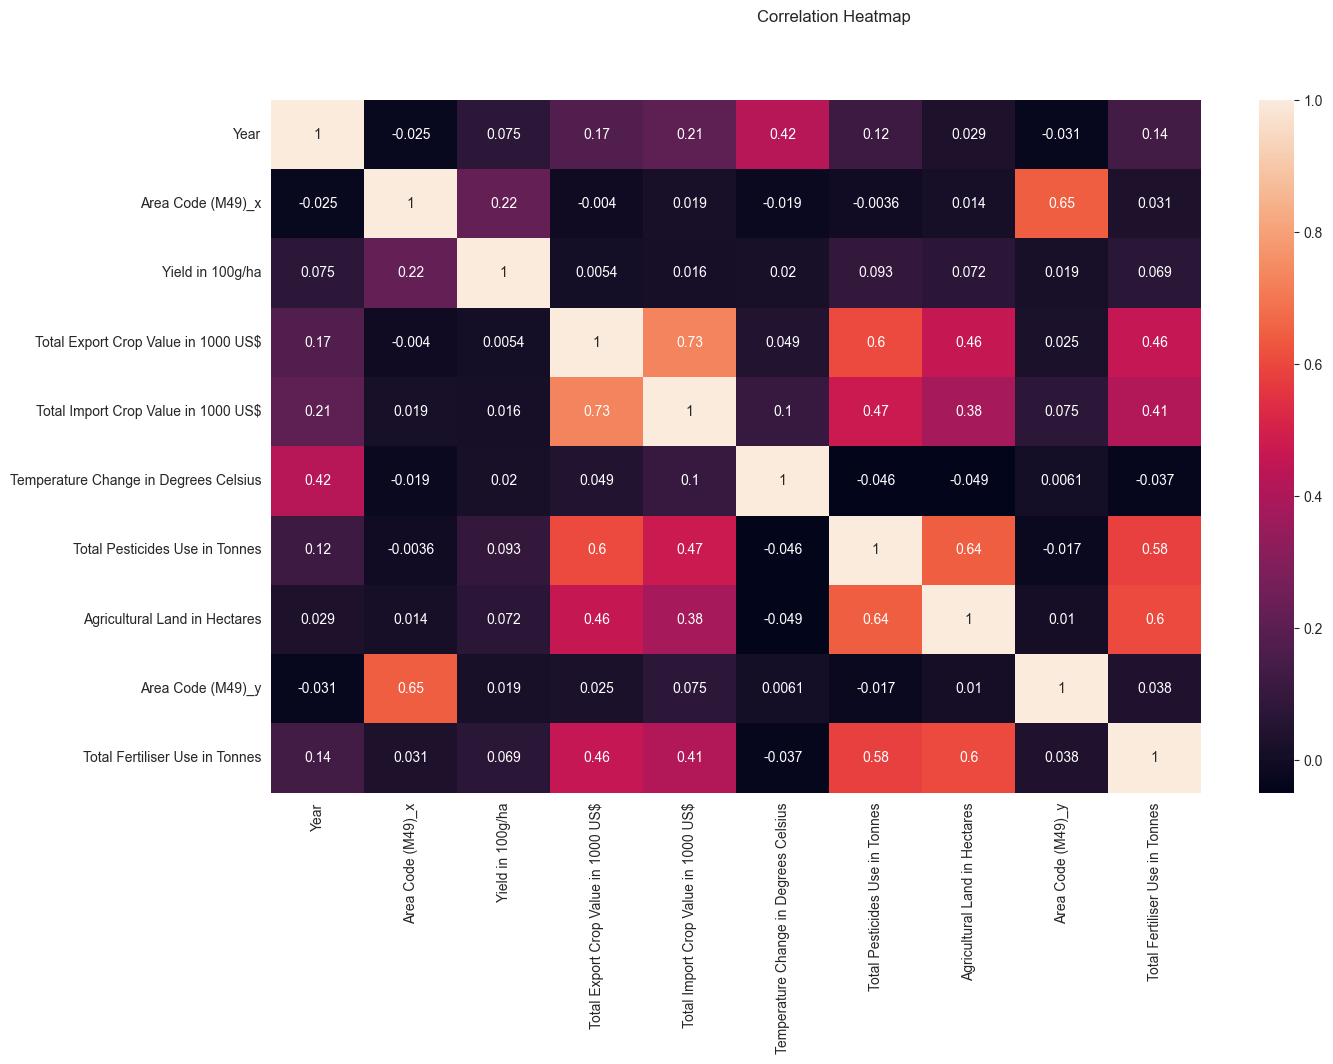

In [1495]:
# Plot a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Correlation Heatmap")

sns.heatmap(correlation_matrix, annot=True, ax=ax)
plt.show()

# 5. Data Preprocessing

In this section, we will preprocess the data for machine learning. We will perform the following steps:
- Encode categorical variables
- Split the data into features and target
- Split the data into training and testing sets
- Scale the data

## 5.1 